# IMPORTAMOS BIBLIOTECAS PARA ANÁLISIS DE DATOS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import json
import matplotlib.colors as colors
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm


# CARGAMOS VISUALIZADOR DE MAPA DEL PERÚ POR REGIONES

In [2]:
#url_geojson = "/kaggle/input/geojson-departamentos-peru/peru_departamental_simple.geojson"
url_geojson= "peru_departamental_simple.geojson"
region_geojson = gpd.read_file(url_geojson)
region_geojson.head()
#ax = region_geojson.plot(figsize=(20,20),edgecolor=u'gray', cmap='Pastel1')
#plt.ylabel('Latitude')
#plt.xlabel('Longitude')
#plt.show()

,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry
0,AMAZONAS,84,01,3930646.567,"POLYGON ((-77.75893 -6.96451, -77.84586 -6.976..."
1,ANCASH,166,02,3596224.600,"POLYGON ((-77.31749 -8.53015, -77.28903 -8.589..."
2,APURIMAC,80,03,2111415.170,"POLYGON ((-72.47177 -14.66140, -72.57725 -14.6..."
3,AREQUIPA,109,04,6325588.935,"POLYGON ((-75.07333 -15.44294, -75.04965 -15.4..."
4,AYACUCHO,111,05,4350381.783,"POLYGON ((-74.34595 -12.17374, -74.32187 -12.2..."


# CARGAMOS DATAFRAMES DE VACUNADOS Y HABITANTES SEGÚN INEI, LUEGO LOS VISUALIZAMOS

In [3]:
vacunas=pd.read_csv("vacunas_covid.csv")
#SINADEF=pd.read_csv("fallecidos_sinadef.csv", delimiter='|')
MASCULINO_INEI=pd.read_csv("MASCULINO.csv", delimiter=';')
FEMENINO_INEI=pd.read_csv("FEMENINO.csv", delimiter=';')
INEI_TOTALES=pd.read_csv("INEI_TOTALES.csv", delimiter=';')


In [4]:
INEI_TOTALES

,EDADES,MUJERES,HOMBRES,TOTAL
0,TOTALES,16641127,16394177,33035304
1,0 - 4,1363558,1429061,2792619
2,5 - 9,1288499,1313359,2601858
3,10 - 14,1350040,1362451,2712491
4,15 - 19,1265724,1228918,2494642
5,20 - 24,1402839,1249221,2652060
6,25 - 29,1398567,1330977,2729544
7,30 - 34,1292197,1328246,2620443
8,35 - 39,1226189,1262203,2488392
9,40 - 44,1121022,1170794,2291816


In [5]:
vacunas

,FECHA_CORTE,UUID,GRUPO_RIESGO,EDAD,SEXO,FECHA_VACUNACION,DOSIS,FABRICANTE,DIRESA,DEPARTAMENTO,PROVINCIA,DISTRITO
0,20211019,6192882,PERSONAL DE SALUD,41,FEMENINO,20210313,2,SINOPHARM,LIMA DIRIS CENTRO,LIMA,LIMA,LIMA
1,20211019,7501539,PERSONAS DE 30 A 39 AÑOS,33,MASCULINO,20211004,2,SINOPHARM,LIMA PROVINCIAS,LIMA,HUAURA,VEGUETA
2,20211019,1124591,PERSONAS DE 50 A 59 AÑOS,54,MASCULINO,20210919,2,PFIZER,PIURA,PIURA,PIURA,CATACAOS
3,20211019,940729,ADULTO MAYOR,87,MASCULINO,20210517,2,PFIZER,PIURA,PIURA,PIURA,CATACAOS
4,20211019,743443,PERSONAS DE 40 A 49 AÑOS,43,FEMENINO,20211010,2,PFIZER,PUNO,PUNO,MOHO,MOHO
...,...,...,...,...,...,...,...,...,...,...,...,...
32475808,20211019,29528557,PERSONAS DE 30 A 39 AÑOS,30,MASCULINO,20211003,2,SINOPHARM,LIMA DIRIS SUR,LIMA,LIMA,SAN JUAN DE MIRAFLORES
32475809,20211019,28530241,PERSONAS DE 30 A 39 AÑOS,31,MASCULINO,20210926,2,SINOPHARM,LIMA DIRIS SUR,LIMA,LIMA,SAN JUAN DE MIRAFLORES
32475810,20211019,13838416,PERSONAS DE 40 A 49 AÑOS,44,MASCULINO,20210724,1,PFIZER,LIMA DIRIS SUR,LIMA,LIMA,SAN JUAN DE MIRAFLORES
32475811,20211019,4388850,PERSONAS DE 50 A 59 AÑOS,56,FEMENINO,20210710,1,PFIZER,ANCASH,ANCASH,HUARAZ,INDEPENDENCIA


In [6]:
MASCULINO_INEI

,Departamento,Total,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 y m�s
0,Amazonas,220649,23562,23114,24375,20082,17083,16545,17880,16209,14610,10963,9780,8165,6440,4837,3226,1968,1810
1,�ncash,599168,55325,50383,52767,42870,44072,48745,50139,45481,40911,33570,31974,28083,21230,17760,14016,10037,11805
2,Apur�mac,220408,21833,21681,22980,18399,15908,17265,20989,18874,15268,11523,8434,7837,6246,4821,3608,2496,2246
3,Arequipa,750544,60646,54328,55622,52384,57658,62039,59302,57643,54512,47475,44482,38990,30835,25527,19669,13093,16339
4,Ayacucho,343311,35249,34617,36489,31115,28209,30912,30759,25481,20513,16782,13516,11774,9249,6940,4893,3541,3272
5,Cajamarca,727990,70871,72152,80819,69323,59923,60402,59301,53175,48220,37046,30388,25045,20041,15697,11077,7053,7457
6,Prov. Const. Callao,560319,45963,39543,38512,33854,37360,39760,38246,40668,44117,40989,37959,32367,24764,21484,17401,12307,15025
7,Cusco,693349,65035,62249,67266,58920,55754,59773,60784,54312,46584,36581,31084,27904,22628,16842,12056,7547,8030
8,Huancavelica,180835,19667,19867,22520,19135,15721,15132,14732,12748,10156,7234,5293,5343,4525,3271,2297,1619,1575
9,Hu�nuco,383420,39225,38647,42079,37187,33953,34145,30357,28071,25084,18520,14248,12128,9812,7515,5347,3574,3528


In [7]:
FEMENINO_INEI

,Departamento,Total,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 y m�s
0,Amazonas,207863,22343,21857,23459,18984,16898,15748,17282,15112,12765,9760,8472,7216,5576,4487,3122,2192,2590
1,�ncash,589223,52106,49281,51826,44661,47977,49017,48141,42690,36606,30817,29519,26266,21844,18561,13730,10920,15261
2,Apur�mac,210201,20743,20695,22282,18087,15786,16546,20061,15932,11821,9004,8624,8022,6258,5274,3943,3339,3784
3,Arequipa,776125,58049,54409,55684,56224,66464,65810,57879,56896,54203,50046,45692,39029,32594,27265,20578,14465,20838
4,Ayacucho,326668,33041,32363,34084,29057,27015,28584,26797,21930,17555,14690,13341,12621,10078,8423,6231,4936,5922
5,Cajamarca,727255,67505,69350,77756,66185,60080,59394,57981,51605,45692,36746,32152,27417,22090,18119,13313,9913,11957
6,Prov. Const. Callao,591161,44198,40250,40405,38979,47796,48699,43046,42917,42503,39648,35845,30888,26773,23408,17387,11767,16652
7,Cusco,676583,62104,59724,64657,57559,57288,59451,56137,49085,41263,33075,31014,28564,23233,18560,13401,9516,11952
8,Huancavelica,177521,18757,19163,21427,18013,14390,13626,13756,12198,9403,7025,6464,5808,4563,4178,3278,2518,2954
9,Hu�nuco,374996,37307,36804,39983,35448,33306,32572,28442,26227,23045,18008,15571,13253,10446,8596,6222,4382,5384


# CREAMOS MODELO DE DATAFRAME POR CADA UNA DE LAS REGIONES QUE UTILIZAREMOS PARA POSTERIORMENTE CREAR PIRÁMIDE POBLACIONAL DE CADA UNO

In [8]:
EDADES_ARREGLO=['0 a 9 años', '10 a 19 años', '20 a 29 años', '30 a 39 años', '40 a 49 años', '50 a 59 años','60 a 69 años', '70 a 79 años','80 a + años']

TOTAL_2_DOSIS_ARREGLO=[0,0,0,0,0,0,0,0,0]
TOTAL_1_DOSIS_ARREGLO=[0,0,0,0,0,0,0,0,0]
N_HOMBRES_2_DOSIS_ARREGLO=[0,0,0,0,0,0,0,0,0]
N_MUJERES_2_DOSIS_ARREGLO=[0,0,0,0,0,0,0,0,0]
N_HOMBRES_1_DOSIS_ARREGLO=[0,0,0,0,0,0,0,0,0]
N_MUJERES_1_DOSIS_ARREGLO=[0,0,0,0,0,0,0,0,0]
PORCENTAJE_HOMBRES_2_DOSIS_ARREGLO=[0,0,0,0,0,0,0,0,0]
PORCENTAJE_MUJERES_2_DOSIS_ARREGLO=[0,0,0,0,0,0,0,0,0]
PORCENTAJE_HOMBRES_1_DOSIS_ARREGLO=[0,0,0,0,0,0,0,0,0]
PORCENTAJE_MUJERES_1_DOSIS_ARREGLO=[0,0,0,0,0,0,0,0,0]
PORCENTAJE_TOTAL_2_DOSIS_ARREGLO=[0,0,0,0,0,0,0,0,0]
PORCENTAJE_TOTAL_1_DOSIS_ARREGLO=[0,0,0,0,0,0,0,0,0]
TOTAL_HOMBRES_ARREGLO=[0,0,0,0,0,0,0,0,0]
TOTAL_MUJERES_ARREGLO=[0,0,0,0,0,0,0,0,0]
TOTAL_PERSONAS=[0,0,0,0,0,0,0,0,0]


EDADES_TRAMA=[0,9,10,19,20,29,30,39,40,49,50,59,60,69,70,79,80,119]

datos_por_region={'EDADES_REGION': EDADES_ARREGLO, 
                  'TOTAL_2_DOSIS': TOTAL_2_DOSIS_ARREGLO,
                  'TOTAL_1_DOSIS': TOTAL_1_DOSIS_ARREGLO,
                  'N_HOMBRES_2_DOSIS': N_HOMBRES_2_DOSIS_ARREGLO,
                  'N_MUJERES_2_DOSIS': N_MUJERES_2_DOSIS_ARREGLO,
                  'N_HOMBRES_1_DOSIS': N_HOMBRES_1_DOSIS_ARREGLO,
                  'N_MUJERES_1_DOSIS': N_MUJERES_1_DOSIS_ARREGLO,
                  'PORCENTAJE_HOMBRES_2_DOSIS_ARREGLO': PORCENTAJE_HOMBRES_2_DOSIS_ARREGLO,
                  'PORCENTAJE_MUJERES_2_DOSIS_ARREGLO': PORCENTAJE_MUJERES_2_DOSIS_ARREGLO,
                  'PORCENTAJE_HOMBRES_1_DOSIS_ARREGLO': PORCENTAJE_HOMBRES_1_DOSIS_ARREGLO,
                  'PORCENTAJE_MUJERES_1_DOSIS_ARREGLO': PORCENTAJE_MUJERES_1_DOSIS_ARREGLO,
                  'PORCENTAJE_TOTAL_2_DOSIS_ARREGLO': PORCENTAJE_TOTAL_2_DOSIS_ARREGLO,
                  'PORCENTAJE_TOTAL_1_DOSIS_ARREGLO': PORCENTAJE_TOTAL_1_DOSIS_ARREGLO,
                  'TOTAL_HOMBRES_ARREGLO': TOTAL_HOMBRES_ARREGLO,
                  'TOTAL_MUJERES_ARREGLO': TOTAL_MUJERES_ARREGLO,
                  'TOTAL_PERSONAS': TOTAL_PERSONAS
                 }




df_por_region=pd.DataFrame(data = datos_por_region)
df_por_region_INDEXADO=df_por_region.set_index('EDADES_REGION')

df_por_region_INDEXADO.astype({'PORCENTAJE_HOMBRES_2_DOSIS_ARREGLO': np.float64, 'PORCENTAJE_HOMBRES_1_DOSIS_ARREGLO': np.float64, 'PORCENTAJE_MUJERES_1_DOSIS_ARREGLO': np.float64, 'PORCENTAJE_MUJERES_2_DOSIS_ARREGLO': np.float64, 'PORCENTAJE_TOTAL_2_DOSIS_ARREGLO': np.float64, 'PORCENTAJE_TOTAL_1_DOSIS_ARREGLO': np.float64})

df_por_region_INDEXADO




,TOTAL_2_DOSIS,TOTAL_1_DOSIS,N_HOMBRES_2_DOSIS,N_MUJERES_2_DOSIS,N_HOMBRES_1_DOSIS,N_MUJERES_1_DOSIS,PORCENTAJE_HOMBRES_2_DOSIS_ARREGLO,PORCENTAJE_MUJERES_2_DOSIS_ARREGLO,PORCENTAJE_HOMBRES_1_DOSIS_ARREGLO,PORCENTAJE_MUJERES_1_DOSIS_ARREGLO,PORCENTAJE_TOTAL_2_DOSIS_ARREGLO,PORCENTAJE_TOTAL_1_DOSIS_ARREGLO,TOTAL_HOMBRES_ARREGLO,TOTAL_MUJERES_ARREGLO,TOTAL_PERSONAS
EDADES_REGION,,,,,,,,,,,,,,,
0 a 9 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10 a 19 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20 a 29 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30 a 39 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40 a 49 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50 a 59 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60 a 69 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
70 a 79 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
80 a + años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
REGIONES=sorted(vacunas.DEPARTAMENTO.unique())


REGIONES_DF=sorted(['ÁNCASH', 'LIMA', 'JUNÍN', 'TUMBES', 'LA LIBERTAD', 'PIURA',
       'CAJAMARCA', 'LAMBAYEQUE', 'AREQUIPA', 'AYACUCHO', 'PASCO',
       'HUANCAVELICA', 'APURÍMAC', 'CUSCO', 'AMAZONAS', 'HUÁNUCO', 'ICA',
       'MOQUEGUA', 'CALLAO', 'SAN MARTÍN', 'PUNO', 'LORETO', 'TACNA',
       'UCAYALI', 'MADRE DE DIOS'])
#REGIONES_DF2=[]


ANCASH=df_por_region_INDEXADO
LIMA=df_por_region_INDEXADO
JUNIN=df_por_region_INDEXADO
TUMBES=df_por_region_INDEXADO
LA_LIBERTAD=df_por_region_INDEXADO
PIURA=df_por_region_INDEXADO
CAJAMARCA=df_por_region_INDEXADO
LAMBAYEQUE=df_por_region_INDEXADO
AREQUIPA=df_por_region_INDEXADO
AYACUCHO=df_por_region_INDEXADO
PASCO=df_por_region_INDEXADO
HUANCAVELICA=df_por_region_INDEXADO
APURIMAC=df_por_region_INDEXADO
CUSCO=df_por_region_INDEXADO
AMAZONAS=df_por_region_INDEXADO
HUANUCO=df_por_region_INDEXADO
ICA=df_por_region_INDEXADO
MOQUEGUA=df_por_region_INDEXADO
CALLAO=df_por_region_INDEXADO
SAN_MARTIN=df_por_region_INDEXADO
PUNO=df_por_region_INDEXADO
LORETO=df_por_region_INDEXADO
TACNA=df_por_region_INDEXADO
UCAYALI=df_por_region_INDEXADO
MADRE_DE_DIOS=df_por_region_INDEXADO


REGIONES_DF2=[AMAZONAS, ANCASH, APURIMAC, AREQUIPA, AYACUCHO, CAJAMARCA, CALLAO, CUSCO, HUANCAVELICA, HUANUCO, ICA, JUNIN, LA_LIBERTAD, LAMBAYEQUE, LIMA, LORETO, MADRE_DE_DIOS, MOQUEGUA, PASCO, PIURA, PUNO, SAN_MARTIN, TACNA, TUMBES, UCAYALI]


REGIONES_DF

['AMAZONAS',
 'APURÍMAC',
 'AREQUIPA',
 'AYACUCHO',
 'CAJAMARCA',
 'CALLAO',
 'CUSCO',
 'HUANCAVELICA',
 'HUÁNUCO',
 'ICA',
 'JUNÍN',
 'LA LIBERTAD',
 'LAMBAYEQUE',
 'LIMA',
 'LORETO',
 'MADRE DE DIOS',
 'MOQUEGUA',
 'PASCO',
 'PIURA',
 'PUNO',
 'SAN MARTÍN',
 'TACNA',
 'TUMBES',
 'UCAYALI',
 'ÁNCASH']

In [10]:
REGIONES_DF2[0]

,TOTAL_2_DOSIS,TOTAL_1_DOSIS,N_HOMBRES_2_DOSIS,N_MUJERES_2_DOSIS,N_HOMBRES_1_DOSIS,N_MUJERES_1_DOSIS,PORCENTAJE_HOMBRES_2_DOSIS_ARREGLO,PORCENTAJE_MUJERES_2_DOSIS_ARREGLO,PORCENTAJE_HOMBRES_1_DOSIS_ARREGLO,PORCENTAJE_MUJERES_1_DOSIS_ARREGLO,PORCENTAJE_TOTAL_2_DOSIS_ARREGLO,PORCENTAJE_TOTAL_1_DOSIS_ARREGLO,TOTAL_HOMBRES_ARREGLO,TOTAL_MUJERES_ARREGLO,TOTAL_PERSONAS
EDADES_REGION,,,,,,,,,,,,,,,
0 a 9 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10 a 19 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20 a 29 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30 a 39 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40 a 49 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50 a 59 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60 a 69 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
70 a 79 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
80 a + años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# ITERAMOS PARA GENERAR DATAFRAME PARA CADA REGIÓN

In [11]:
for k in range(len(REGIONES_DF2)):
    for j in [2,1]:   #Usamos 1 y 2 por la cantidad de dosis aplicadas hasta la fecha
        for i in range(9):
            if j == 2 :          
                total = vacunas.loc[(vacunas.EDAD >= EDADES_TRAMA[2*i]) & (vacunas.EDAD <= EDADES_TRAMA[2*i+1]) & (vacunas.DOSIS == j)&(vacunas.DEPARTAMENTO==REGIONES[k])]
                femenino = vacunas.loc[(vacunas.EDAD >= EDADES_TRAMA[2*i]) & (vacunas.EDAD <= EDADES_TRAMA[2*i+1]) & (vacunas.DOSIS == j)& (vacunas.SEXO == 'MASCULINO')&(vacunas.DEPARTAMENTO==REGIONES[k])]
                masculino = vacunas.loc[(vacunas.EDAD >= EDADES_TRAMA[2*i]) & (vacunas.EDAD <= EDADES_TRAMA[2*i+1]) & (vacunas.DOSIS == j)& (vacunas.SEXO == 'FEMENINO')&(vacunas.DEPARTAMENTO==REGIONES[k])]
                total_t=total.count()  #a.count() es una serie
                masculino_t=masculino.count()
                femenino_t=femenino.count()
                #aquí pasamos por cada uno de los rangos de edad el total de vacunados, el total de masculinos vacunados
                # y femeninos vacunados, la ubicación lo hacemos con el iat y cogimos el valor cero porque allí se ubican
                #las cuentas al hacer el count a una serie
                df_por_region_INDEXADO.iat[i,j-2]=total_t[0]
                df_por_region_INDEXADO.iat[i,j]=masculino_t[0]
                df_por_region_INDEXADO.iat[i,j+1]=femenino_t[0]
            if j == 1 :          
                total = vacunas.loc[(vacunas.EDAD >= EDADES_TRAMA[2*i]) & (vacunas.EDAD <= EDADES_TRAMA[2*i+1]) & (vacunas.DOSIS == j)&(vacunas.DEPARTAMENTO==REGIONES[k])]
                femenino = vacunas.loc[(vacunas.EDAD >= EDADES_TRAMA[2*i]) & (vacunas.EDAD <= EDADES_TRAMA[2*i+1]) & (vacunas.DOSIS == j)& (vacunas.SEXO == 'MASCULINO')&(vacunas.DEPARTAMENTO==REGIONES[k])]
                masculino = vacunas.loc[(vacunas.EDAD >= EDADES_TRAMA[2*i]) & (vacunas.EDAD <= EDADES_TRAMA[2*i+1]) & (vacunas.DOSIS == j)& (vacunas.SEXO == 'FEMENINO')&(vacunas.DEPARTAMENTO==REGIONES[k])]
                total_t=total.count()  #a.count() es una serie
                masculino_t=masculino.count()
                femenino_t=femenino.count()
                #aquí pasamos por cada uno de los rangos de edad el total de vacunados, el total de masculinos vacunados
                # y femeninos vacunados, la ubicación lo hacemos con el iat y cogimos el valor cero porque allí se ubican
                #las cuentas al hacer el count a una serie
                df_por_region_INDEXADO.iat[i,j]=abs(total_t[0] - df_por_region_INDEXADO.iat[i,j-1])
                df_por_region_INDEXADO.iat[i,4*j]=abs(masculino_t[0]-df_por_region_INDEXADO.iat[i,2*j])
                df_por_region_INDEXADO.iat[i,4*j+1]=abs(femenino_t[0]-df_por_region_INDEXADO.iat[i,2*j+1])            
            
            
    REGIONES_DF2[k]=df_por_region_INDEXADO.copy() #usamos copy para hacer un shallow copy y de esa forma poder obtener un nuevo DF que podemos variar

    
#REGIONES[k]

In [12]:
AMAZONAS=REGIONES_DF2[0]
ANCASH=REGIONES_DF2[1]
APURIMAC=REGIONES_DF2[2]
AREQUIPA=REGIONES_DF2[3]
AYACUCHO=REGIONES_DF2[4]
CAJAMARCA=REGIONES_DF2[5]
CALLAO=REGIONES_DF2[6]
CUSCO=REGIONES_DF2[7]
HUANCAVELICA=REGIONES_DF2[8]
HUANUCO=REGIONES_DF2[9]
ICA=REGIONES_DF2[10]
JUNIN=REGIONES_DF2[11]
LA_LIBERTAD=REGIONES_DF2[12]
LAMBAYEQUE=REGIONES_DF2[13]
LIMA=REGIONES_DF2[14]
LORETO=REGIONES_DF2[15]
MADRE_DE_DIOS=REGIONES_DF2[16]
MOQUEGUA=REGIONES_DF2[17]
PASCO=REGIONES_DF2[18]
PIURA=REGIONES_DF2[19]
PUNO=REGIONES_DF2[20]
SAN_MARTIN=REGIONES_DF2[21]
TACNA=REGIONES_DF2[22]
TUMBES=REGIONES_DF2[23]
UCAYALI=REGIONES_DF2[24]




In [13]:
UCAYALI

,TOTAL_2_DOSIS,TOTAL_1_DOSIS,N_HOMBRES_2_DOSIS,N_MUJERES_2_DOSIS,N_HOMBRES_1_DOSIS,N_MUJERES_1_DOSIS,PORCENTAJE_HOMBRES_2_DOSIS_ARREGLO,PORCENTAJE_MUJERES_2_DOSIS_ARREGLO,PORCENTAJE_HOMBRES_1_DOSIS_ARREGLO,PORCENTAJE_MUJERES_1_DOSIS_ARREGLO,PORCENTAJE_TOTAL_2_DOSIS_ARREGLO,PORCENTAJE_TOTAL_1_DOSIS_ARREGLO,TOTAL_HOMBRES_ARREGLO,TOTAL_MUJERES_ARREGLO,TOTAL_PERSONAS
EDADES_REGION,,,,,,,,,,,,,,,
0 a 9 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10 a 19 años,6446,2829,3592,2854,1543,1286,0,0,0,0,0,0,0,0,0
20 a 29 años,33086,13251,18532,14554,7002,6249,0,0,0,0,0,0,0,0,0
30 a 39 años,39760,11732,21563,18197,5635,6097,0,0,0,0,0,0,0,0,0
40 a 49 años,33482,8040,17267,16215,3632,4408,0,0,0,0,0,0,0,0,0
50 a 59 años,28913,5414,14391,14522,2357,3057,0,0,0,0,0,0,0,0,0
60 a 69 años,21256,2032,9762,11494,828,1204,0,0,0,0,0,0,0,0,0
70 a 79 años,9773,967,4386,5387,424,543,0,0,0,0,0,0,0,0,0
80 a + años,3456,351,1740,1716,162,189,0,0,0,0,0,0,0,0,0


In [14]:
AMAZONAS

,TOTAL_2_DOSIS,TOTAL_1_DOSIS,N_HOMBRES_2_DOSIS,N_MUJERES_2_DOSIS,N_HOMBRES_1_DOSIS,N_MUJERES_1_DOSIS,PORCENTAJE_HOMBRES_2_DOSIS_ARREGLO,PORCENTAJE_MUJERES_2_DOSIS_ARREGLO,PORCENTAJE_HOMBRES_1_DOSIS_ARREGLO,PORCENTAJE_MUJERES_1_DOSIS_ARREGLO,PORCENTAJE_TOTAL_2_DOSIS_ARREGLO,PORCENTAJE_TOTAL_1_DOSIS_ARREGLO,TOTAL_HOMBRES_ARREGLO,TOTAL_MUJERES_ARREGLO,TOTAL_PERSONAS
EDADES_REGION,,,,,,,,,,,,,,,
0 a 9 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10 a 19 años,3336,4458,1765,1571,2410,2048,0,0,0,0,0,0,0,0,0
20 a 29 años,22194,16092,12370,9824,8298,7794,0,0,0,0,0,0,0,0,0
30 a 39 años,30686,10845,16472,14214,4992,5853,0,0,0,0,0,0,0,0,0
40 a 49 años,31083,4709,15787,15296,1906,2803,0,0,0,0,0,0,0,0,0
50 a 59 años,24425,2865,12186,12239,1163,1702,0,0,0,0,0,0,0,0,0
60 a 69 años,17749,1452,8455,9294,622,830,0,0,0,0,0,0,0,0,0
70 a 79 años,10686,719,5281,5405,317,402,0,0,0,0,0,0,0,0,0
80 a + años,6289,385,3344,2945,191,194,0,0,0,0,0,0,0,0,0


# CALCULAMOS EL PORCENTAJE DE VACUNADOS DE 2 DOSIS Y 1 DOSIS EN CADA RANGO DE EDAD POR REGIÓN (USAMOS DATA DE INEI Y LA COMPARAMOS CON LOS VACUNADOS)

In [15]:
#DAF= MASCULINO_INEI.iloc[:,2] + MASCULINO_INEI.iloc[:,3]
MASCULINO_INEI=pd.read_csv("MASCULINO.csv", delimiter=';')
FEMENINO_INEI=pd.read_csv("FEMENINO.csv", delimiter=';')

#mas=MASCULINO_INEI.iloc[0]
#mas
#REGIONES_DF2[0]
for t in range(len(REGIONES)):
    
    X=REGIONES_DF2[t]
    X[np.isnan(X)]  = 0
    #X['PORCENTAJE_TOTAL_2_DOSIS_ARREGLO'].astype("Int32")
    #X['PORCENTAJE_TOTAL_1_DOSIS_ARREGLO'].astype("Int32")
    #X['PORCENTAJE_MUJERES_2_DOSIS_ARREGLO'].astype("Int32")
    #X['PORCENTAJE_MUJERES_1_DOSIS_ARREGLO'].astype("Int32")
    #X['PORCENTAJE_HOMBRES_2_DOSIS_ARREGLO'].astype("Int32")
    #X['PORCENTAJE_HOMBRES_1_DOSIS_ARREGLO'].astype("Int32")
    for m in range(9):
        mas=MASCULINO_INEI.iloc[t]
        bas=FEMENINO_INEI.iloc[t]
        if (m>0 and m < 8 ):

            ar=int(mas[2*(m+1)])+int(mas[2*(m+1)+1])
            bar=int(bas[2*(m+1)])+int(bas[2*(m+1)+1])

            REGIONES_DF2[t].iat[m,12]=ar
            REGIONES_DF2[t].iat[m,13]=bar
            REGIONES_DF2[t].iat[m,14]=bar+ar
            
            REGIONES_DF2[t].iat[m,10]=(REGIONES_DF2[t].iloc[m,0]*100)/(REGIONES_DF2[t].iloc[m,0]+REGIONES_DF2[t].iloc[m,1])      #%total_2_dosis
            REGIONES_DF2[t].iat[m,11]=(REGIONES_DF2[t].iloc[m,1]*100)/(REGIONES_DF2[t].iloc[m,0]+REGIONES_DF2[t].iloc[m,1])      #%total_1_dosis
            REGIONES_DF2[t].iat[m,6]=(REGIONES_DF2[t].iloc[m,2]*100)/(REGIONES_DF2[t].iloc[m,2]+REGIONES_DF2[t].iloc[m,4])       #%hombres 2 dosis
            REGIONES_DF2[t].iat[m,7]=(REGIONES_DF2[t].iloc[m,3]*100)/(REGIONES_DF2[t].iloc[m,3]+REGIONES_DF2[t].iloc[m,5])       #%mujeres 2 dosis
            REGIONES_DF2[t].iat[m,8]=(REGIONES_DF2[t].iloc[m,4]*100)/(REGIONES_DF2[t].iloc[m,2]+REGIONES_DF2[t].iloc[m,4])       #%hombres 1 dosis
            REGIONES_DF2[t].iat[m,9]=(REGIONES_DF2[t].iloc[m,5]*100)/(REGIONES_DF2[t].iloc[m,3]+REGIONES_DF2[t].iloc[m,5])       #%mujeres 1 dosis            
            

            #REGIONES_DF2[t].iat[m,10]=REGIONES_DF2[t].iloc[m,0]*100/REGIONES_DF2[t].iloc[m,14] #%total_2_dosis
            #REGIONES_DF2[t].iat[m,11]=REGIONES_DF2[t].iloc[m,1]*100/REGIONES_DF2[t].iloc[m,14] #%total_1_dosis
            #REGIONES_DF2[t].iat[m,6]=REGIONES_DF2[t].iloc[m,2]*100/REGIONES_DF2[t].iloc[m,12] #%hombres 2 dosis
            #REGIONES_DF2[t].iat[m,7]=REGIONES_DF2[t].iloc[m,3]*100/REGIONES_DF2[t].iloc[m,13] #%mujeres 2 dosis
            #REGIONES_DF2[t].iat[m,8]=REGIONES_DF2[t].iloc[m,4]*100/REGIONES_DF2[t].iloc[m,12] #%hombres 1 dosis
            #REGIONES_DF2[t].iat[m,9]=REGIONES_DF2[t].iloc[m,5]*100/REGIONES_DF2[t].iloc[m,13] #%mujeres 1 dosis
        elif (m == 8):
            #print(m)
            ar=int(mas[2*(m+1)])
            bar=int(bas[2*(m+1)])
            REGIONES_DF2[t].iat[m,12]=ar
            REGIONES_DF2[t].iat[m,13]=bar
            REGIONES_DF2[t].iat[m,14]=bar+ar
            REGIONES_DF2[t].iat[m,10]=REGIONES_DF2[t].iloc[m,0]*100/(REGIONES_DF2[t].iloc[m,0]+REGIONES_DF2[t].iloc[m,1])      #%total_2_dosis
            REGIONES_DF2[t].iat[m,11]=REGIONES_DF2[t].iloc[m,1]*100/(REGIONES_DF2[t].iloc[m,0]+REGIONES_DF2[t].iloc[m,1])      #%total_1_dosis
            REGIONES_DF2[t].iat[m,6]=REGIONES_DF2[t].iloc[m,2]*100/(REGIONES_DF2[t].iloc[m,2]+REGIONES_DF2[t].iloc[m,4])       #%hombres 2 dosis
            REGIONES_DF2[t].iat[m,7]=REGIONES_DF2[t].iloc[m,3]*100/(REGIONES_DF2[t].iloc[m,3]+REGIONES_DF2[t].iloc[m,5])       #%mujeres 2 dosis
            REGIONES_DF2[t].iat[m,8]=REGIONES_DF2[t].iloc[m,4]*100/(REGIONES_DF2[t].iloc[m,2]+REGIONES_DF2[t].iloc[m,4])       #%hombres 1 dosis
            REGIONES_DF2[t].iat[m,9]=REGIONES_DF2[t].iloc[m,5]*100/(REGIONES_DF2[t].iloc[m,3]+REGIONES_DF2[t].iloc[m,5])       #%mujeres 1 dosis
                                                                           
            #REGIONES_DF2[t].iat[m,10]=REGIONES_DF2[t].iloc[m,0]*100/REGIONES_DF2[t].iloc[m,14] #%total_2_dosis
            #REGIONES_DF2[t].iat[m,11]=REGIONES_DF2[t].iloc[m,1]*100/REGIONES_DF2[t].iloc[m,14] #%total_1_dosis
            #REGIONES_DF2[t].iat[m,6]=REGIONES_DF2[t].iloc[m,2]*100/REGIONES_DF2[t].iloc[m,12] #%hombres 2 dosis
            #REGIONES_DF2[t].iat[m,7]=REGIONES_DF2[t].iloc[m,3]*100/REGIONES_DF2[t].iloc[m,13] #%mujeres 2 dosis
            #REGIONES_DF2[t].iat[m,8]=REGIONES_DF2[t].iloc[m,4]*100/REGIONES_DF2[t].iloc[m,12] #%hombres 1 dosis
            #REGIONES_DF2[t].iat[m,9]=REGIONES_DF2[t].iloc[m,5]*100/REGIONES_DF2[t].iloc[m,13] #%mujeres 1 dosis
    
AMAZONAS
print(REGIONES_DF2[15].iloc[7,0])
print(REGIONES_DF2[15].iloc[7,1])
print(REGIONES_DF2[15].iloc[7,0]*100/(REGIONES_DF2[15].iloc[7,0]+REGIONES_DF2[15].iloc[7,1]))

#MASCULINO_INEI.iloc[0]

18923
2482
88.40457836953983


In [16]:
LORETO

,TOTAL_2_DOSIS,TOTAL_1_DOSIS,N_HOMBRES_2_DOSIS,N_MUJERES_2_DOSIS,N_HOMBRES_1_DOSIS,N_MUJERES_1_DOSIS,PORCENTAJE_HOMBRES_2_DOSIS_ARREGLO,PORCENTAJE_MUJERES_2_DOSIS_ARREGLO,PORCENTAJE_HOMBRES_1_DOSIS_ARREGLO,PORCENTAJE_MUJERES_1_DOSIS_ARREGLO,PORCENTAJE_TOTAL_2_DOSIS_ARREGLO,PORCENTAJE_TOTAL_1_DOSIS_ARREGLO,TOTAL_HOMBRES_ARREGLO,TOTAL_MUJERES_ARREGLO,TOTAL_PERSONAS
EDADES_REGION,,,,,,,,,,,,,,,
0 a 9 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10 a 19 años,2708,3046,1292,1416,1524,1522,45,48,54,51,47,52,107914,104128,212042
20 a 29 años,12789,42513,6221,6568,23861,18652,20,26,79,73,23,76,82670,84535,167205
30 a 39 años,55126,28505,30536,24590,14115,14390,68,63,31,36,65,34,77990,71427,149417
40 a 49 años,57453,16425,29617,27836,7423,9002,79,75,20,24,77,22,58846,48391,107237
50 a 59 años,48953,9699,24622,24331,4155,5544,85,81,14,18,83,16,39656,33164,72820
60 a 69 años,36161,5239,17276,18885,2161,3078,88,85,11,14,87,12,26967,23084,50051
70 a 79 años,18923,2482,8972,9951,1079,1403,89,87,10,12,88,11,14271,12329,26600
80 a + años,6955,1051,3642,3313,498,553,87,85,12,14,86,13,4431,6336,10767


# ITERAMOS PARA GENERAR LOS GRÁFICOS DE PIRÁMIDES POBLACIONALES PARA CADA REGIÓN

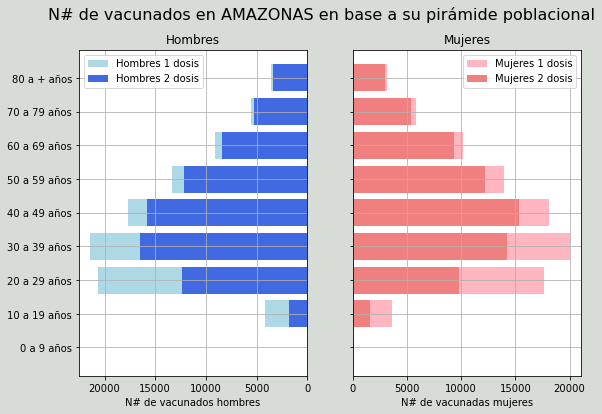

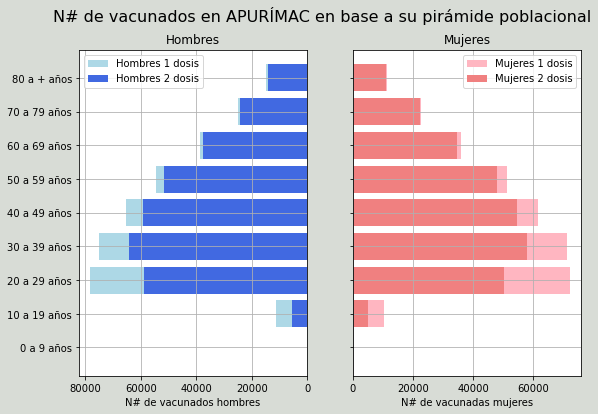

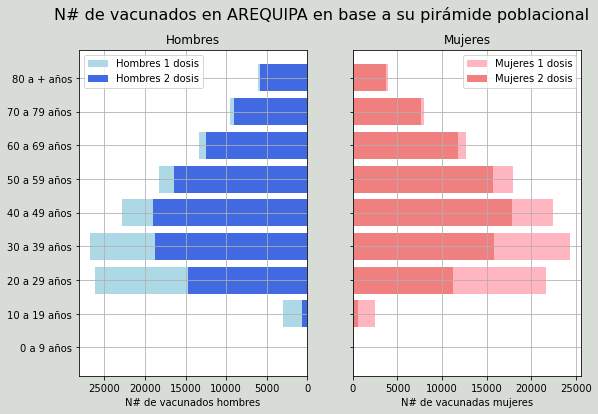

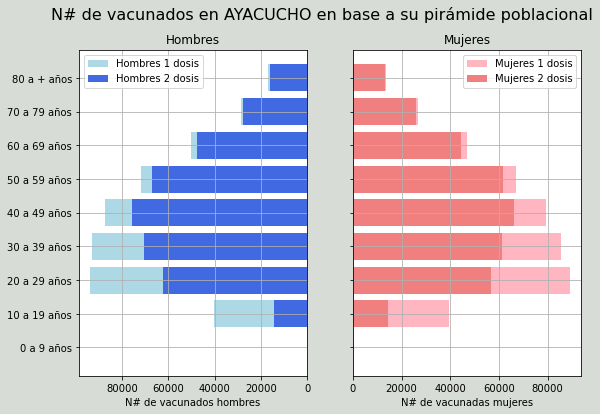

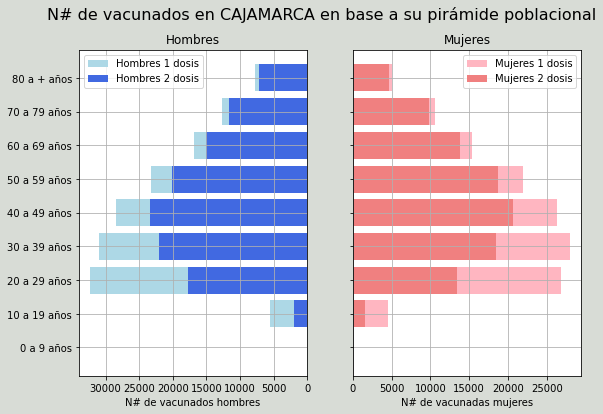

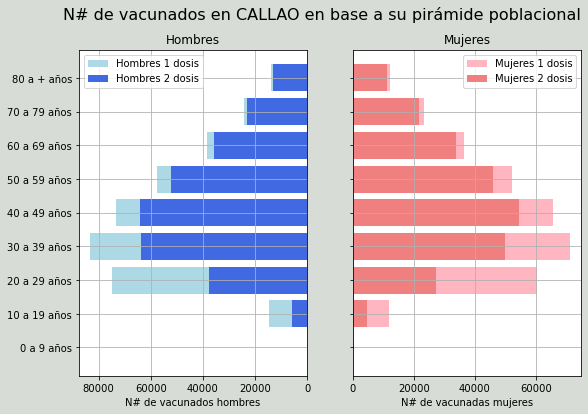

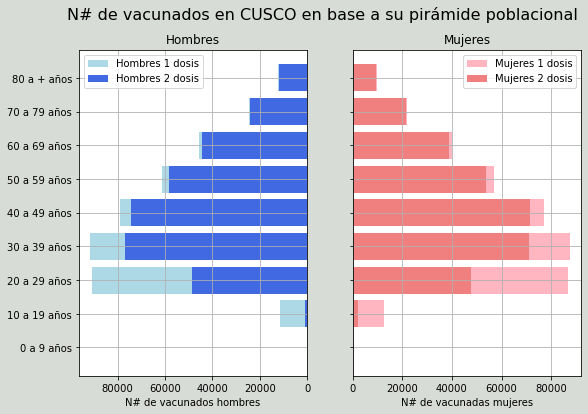

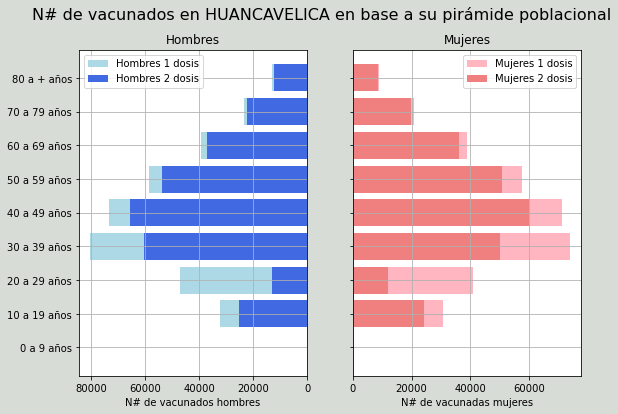

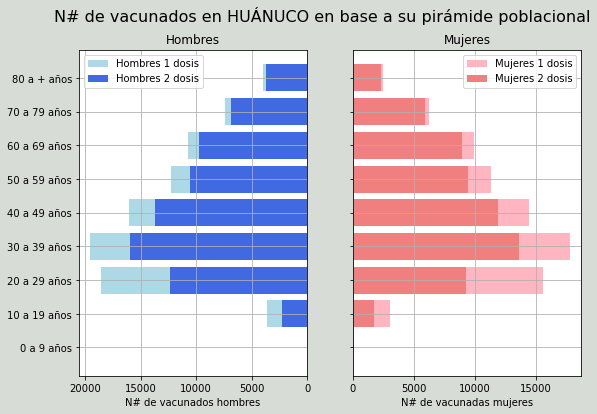

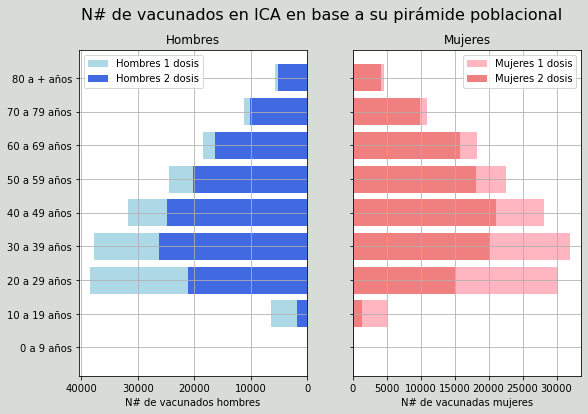

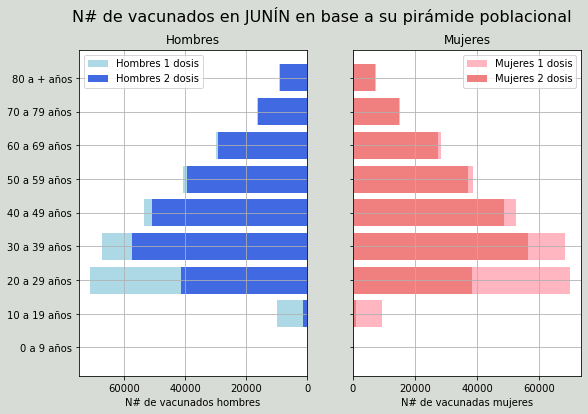

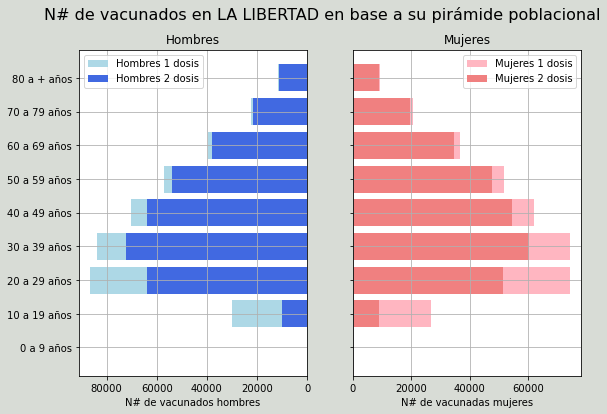

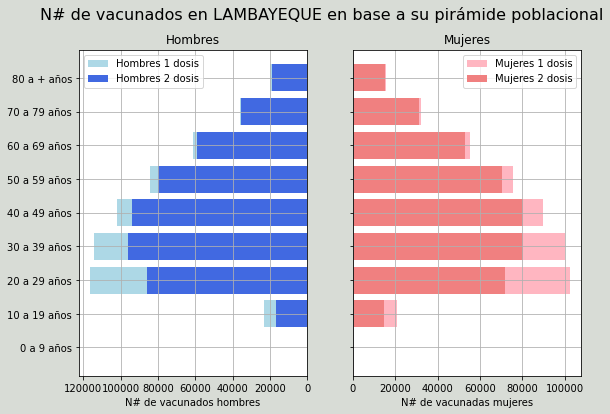

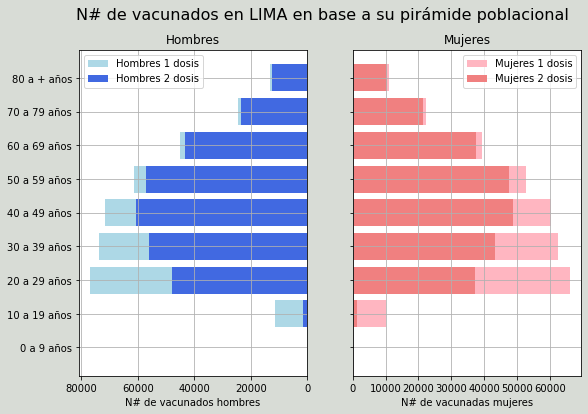

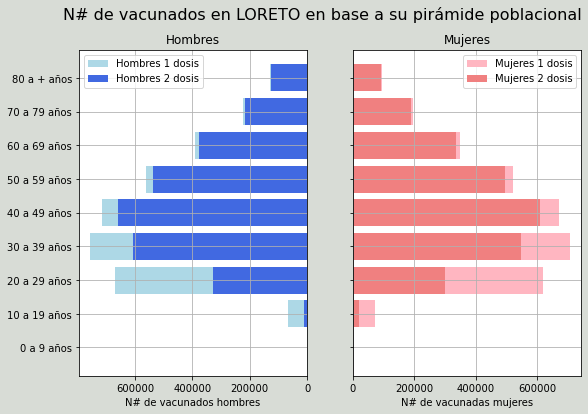

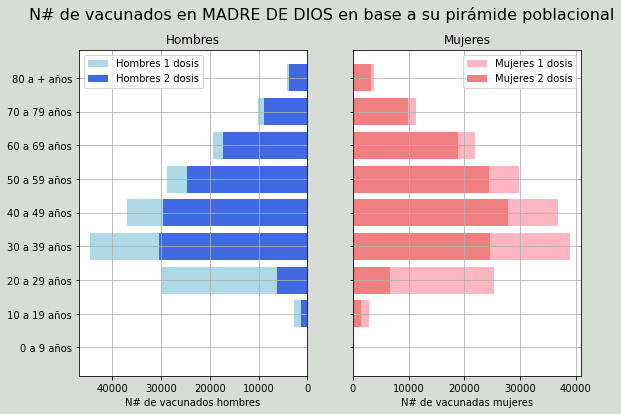

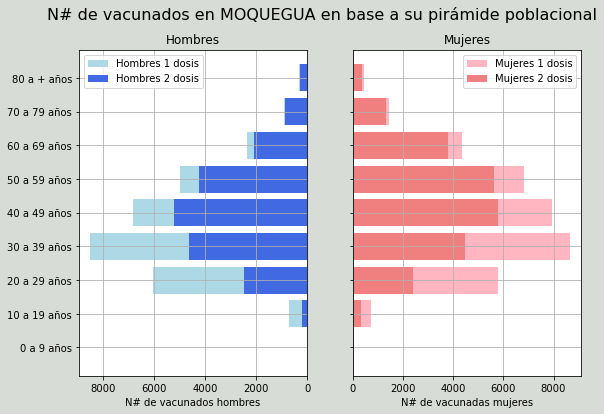

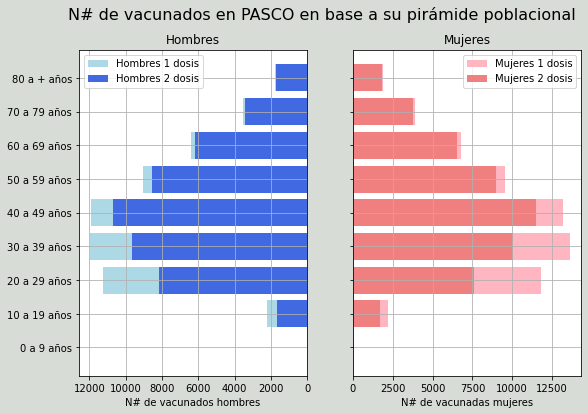

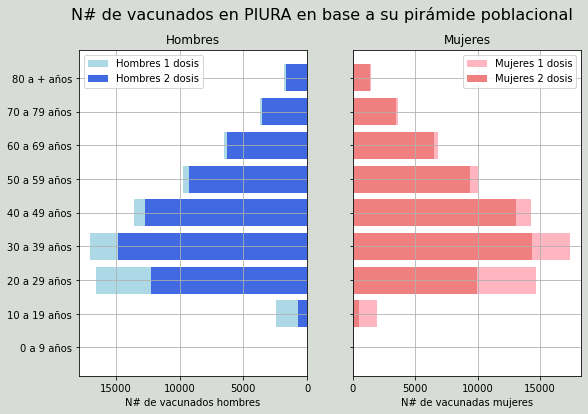

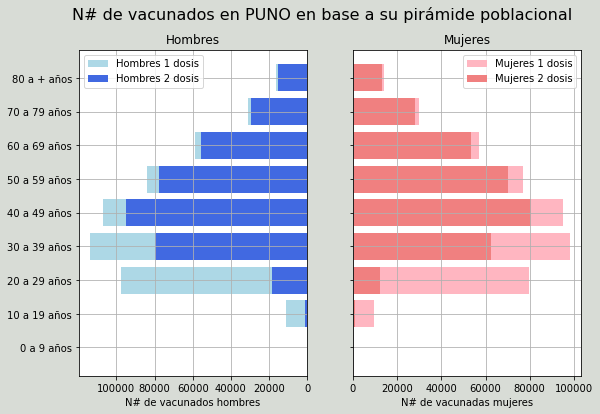

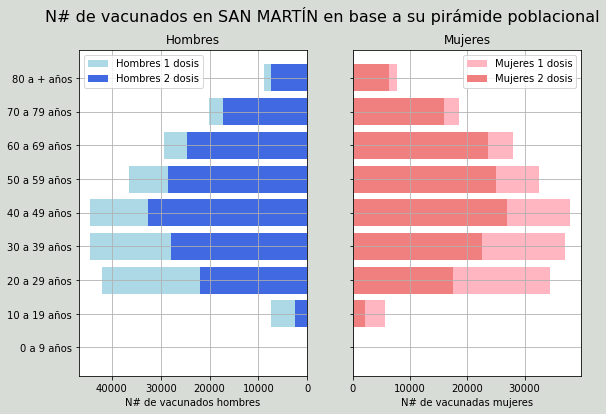

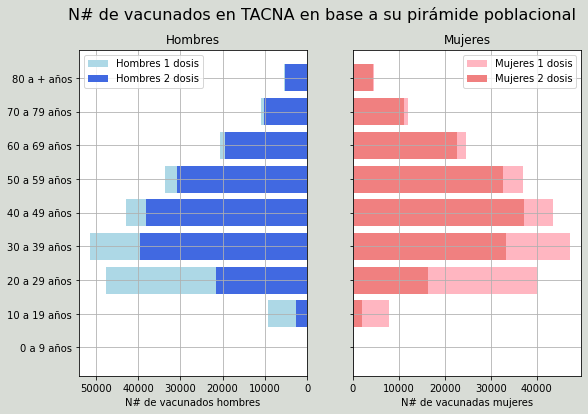

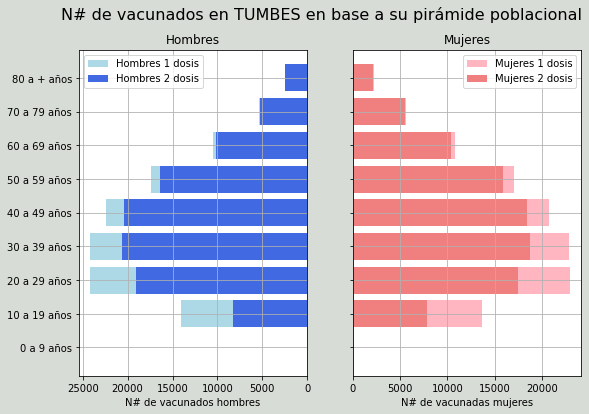

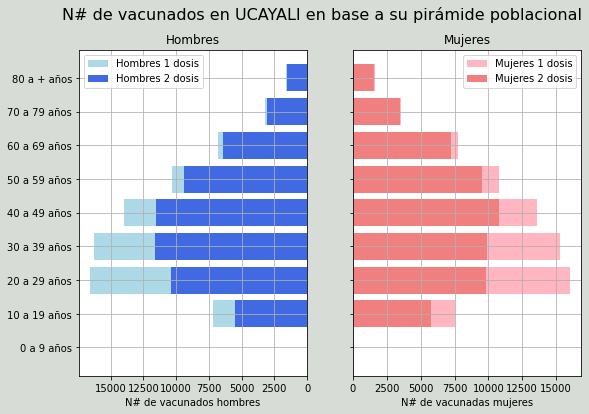

In [17]:
for g in range(len(REGIONES)-1):   
    #DEFINIMOS X Y LÍMITES
    y = range(0, len(REGIONES_DF2[g]))
    x_male_2_dosis = REGIONES_DF2[g].N_HOMBRES_2_DOSIS
    x_female_2_dosis = REGIONES_DF2[g].N_MUJERES_2_DOSIS
    x_male_1_dosis = REGIONES_DF2[g].N_HOMBRES_1_DOSIS
    x_female_1_dosis = REGIONES_DF2[g].N_MUJERES_1_DOSIS
    
    #DEFINIMOS LOS PARÁMETROS DEL PLOT
    fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))
    fig.suptitle('N# de vacunados en ' + REGIONES_DF[g] + ' en base a su pirámide poblacional', fontsize=16)
    #ESPECIFICAMOS EL COLOR DE ATRÁS Y EL TÍTULO
    fig.patch.set_facecolor('xkcd:light grey')
    #plt.figtext(.5,.9,REGIONES_DF[g], fontsize=15, ha='center')

    #DEFINE BARRAS DE HOMBRES Y MUJERES
    axes[0].barh(y, x_male_1_dosis, align='center', color='lightblue',label ='Hombres 1 dosis',  left=x_male_2_dosis)
    axes[0].barh(y, x_male_2_dosis, align='center', color='royalblue',label ='Hombres 2 dosis')

    axes[0].set(title='Hombres')
    axes[1].barh(y, x_female_1_dosis, align='center', color='lightpink',label ='Mujeres 1 dosis',  left=x_female_2_dosis)
    axes[1].barh(y, x_female_2_dosis, align='center', color='lightcoral',label ='Mujeres 2 dosis')

    axes[1].set(title='Mujeres')

    #CONFIGURA LA GRILLA, LABELS Y EJE Y
    axes[0].legend()
    axes[1].legend()  
    axes[1].grid()
    axes[0].set(yticks=y, yticklabels=EDADES_ARREGLO)
    axes[0].invert_xaxis()
    axes[0].grid()
    axes[0].set_xlabel('N# de vacunados hombres')  
    axes[1].set_xlabel('N# de vacunadas mujeres') 
    #PLOTEAR
    plt.show()

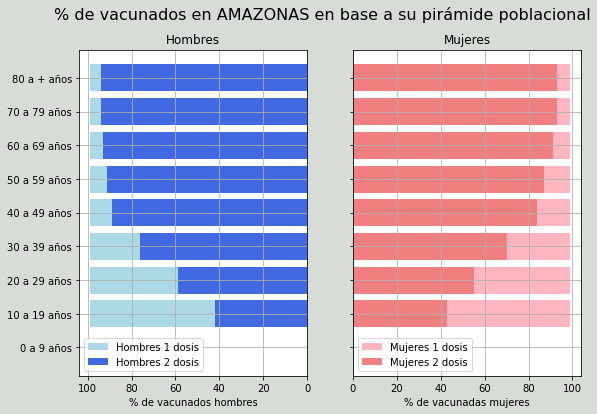

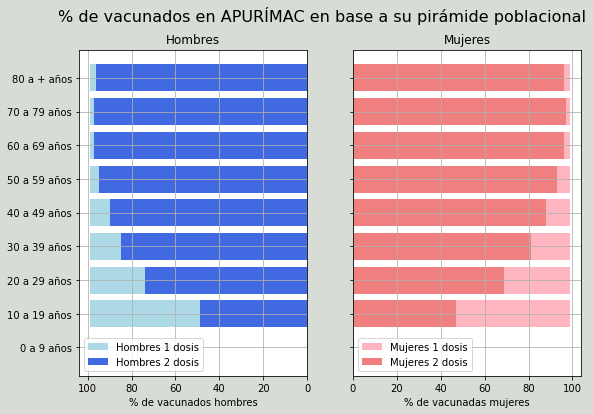

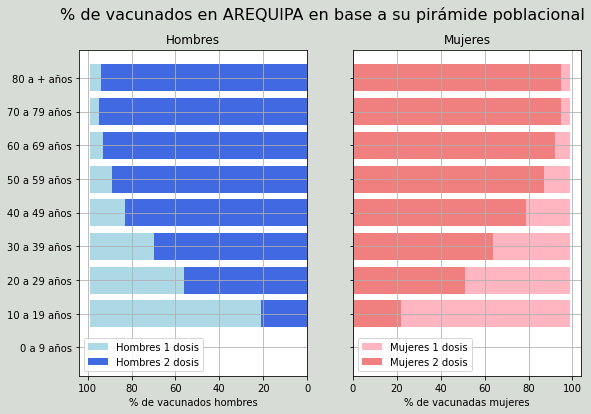

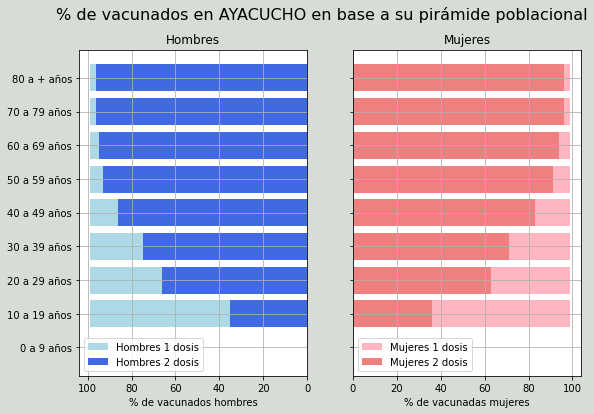

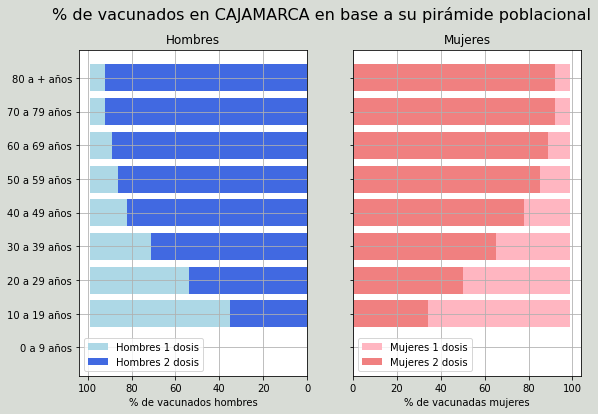

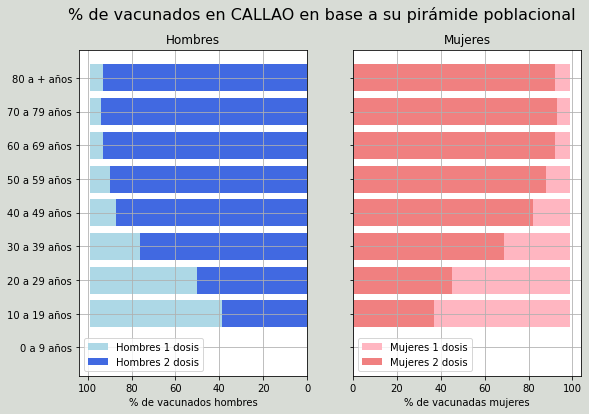

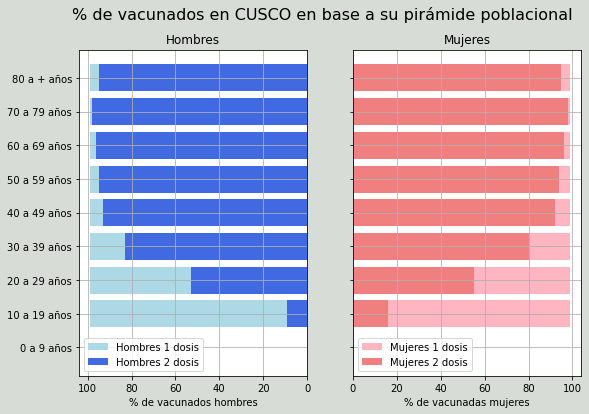

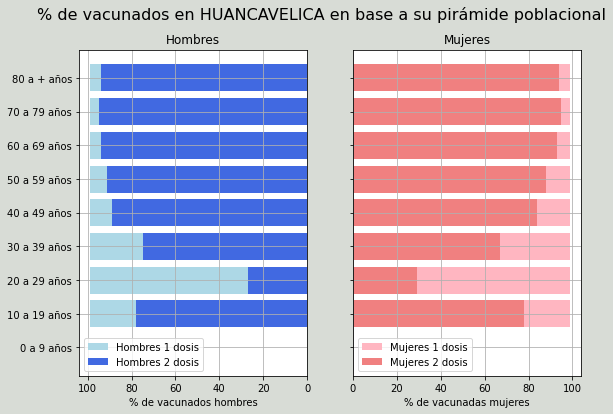

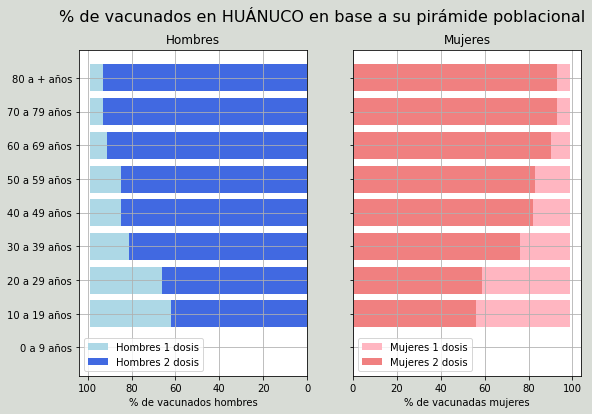

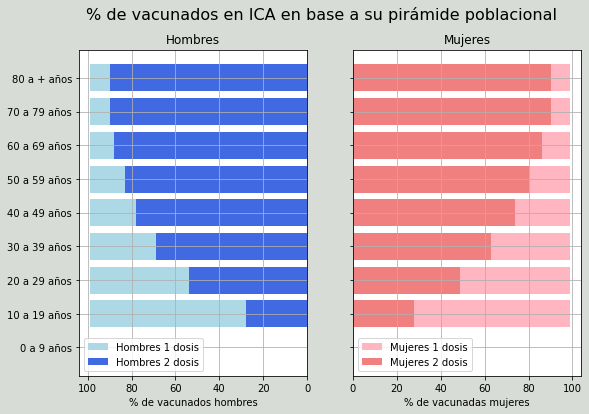

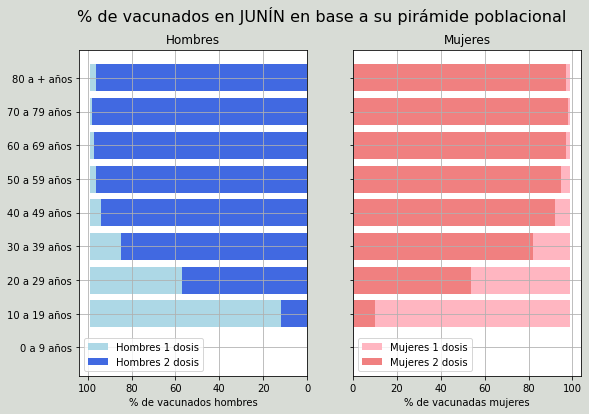

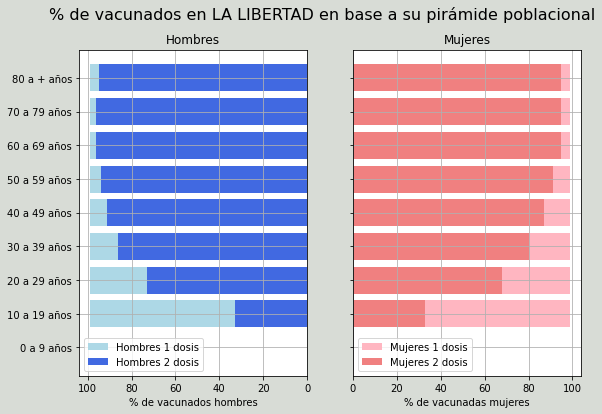

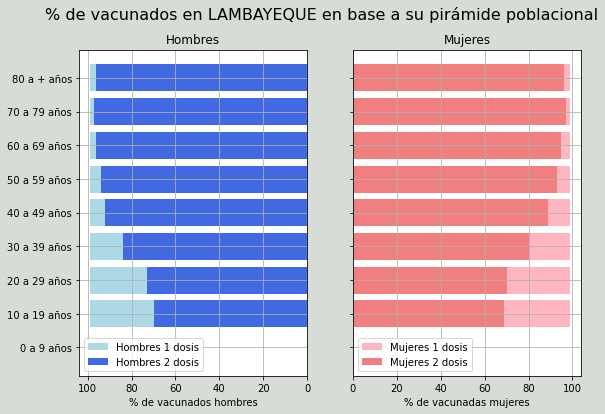

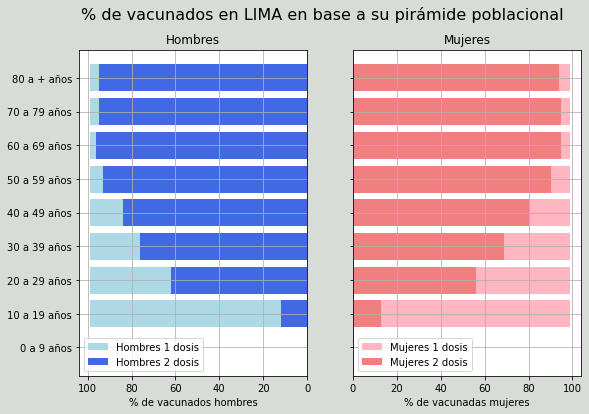

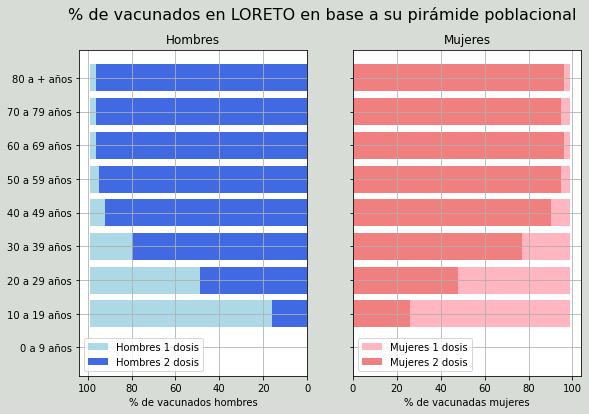

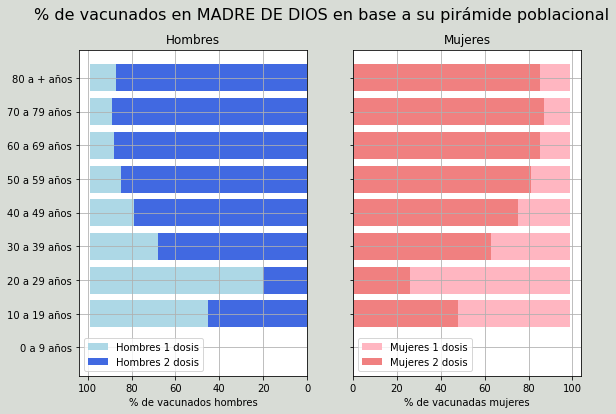

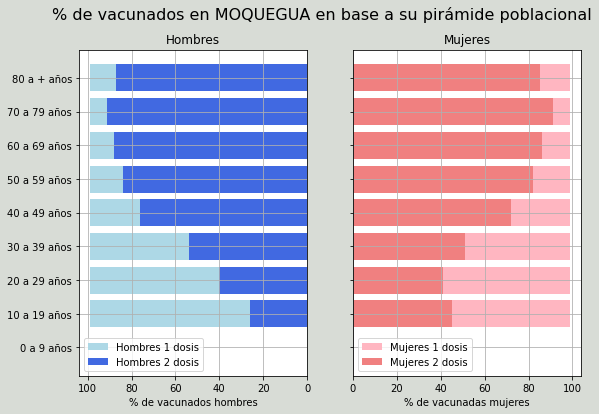

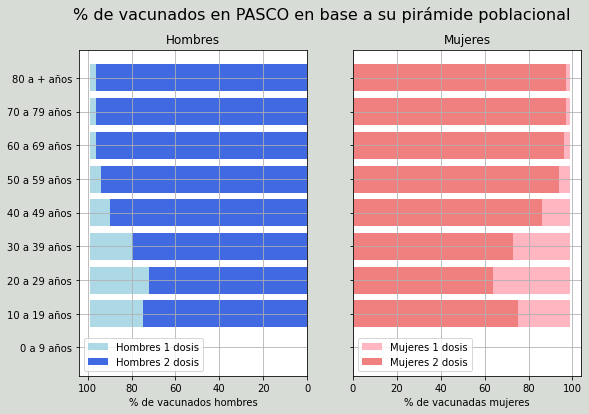

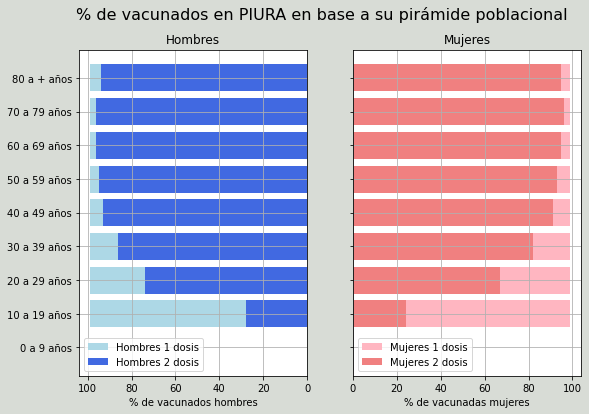

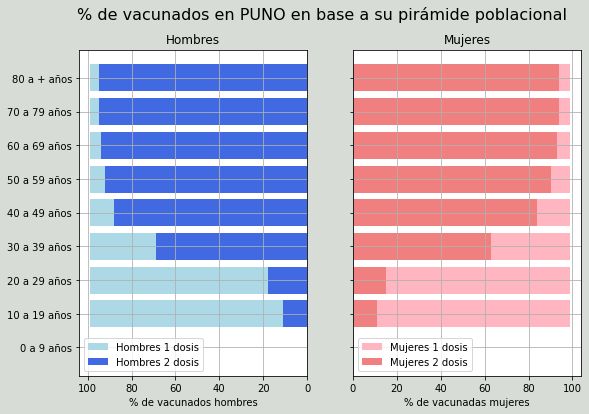

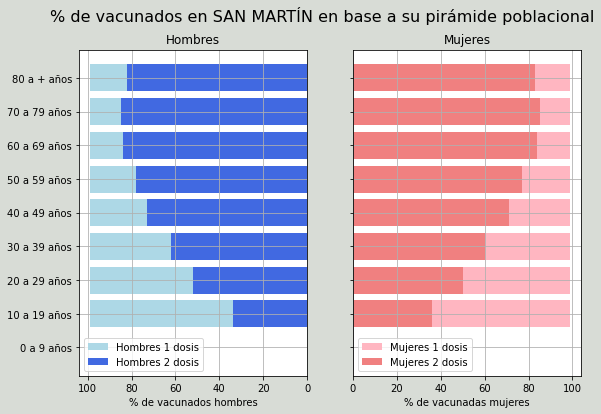

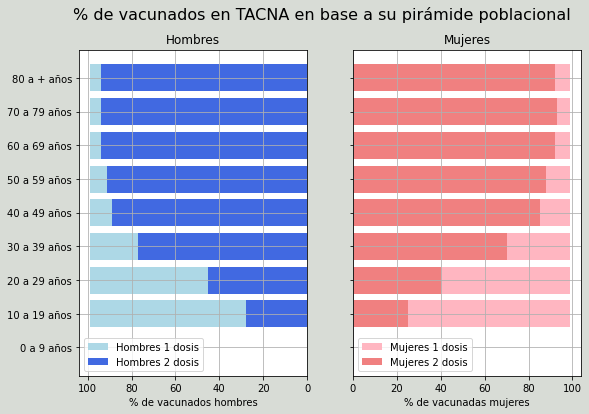

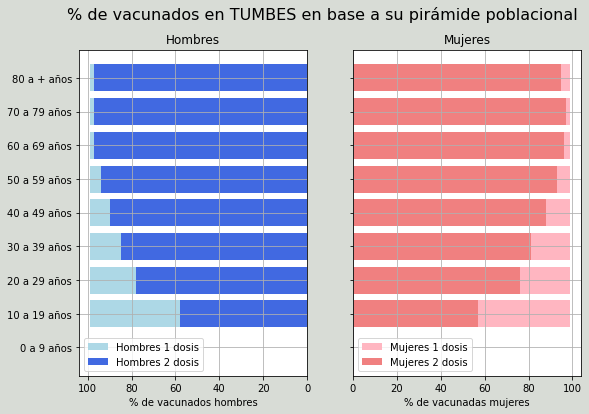

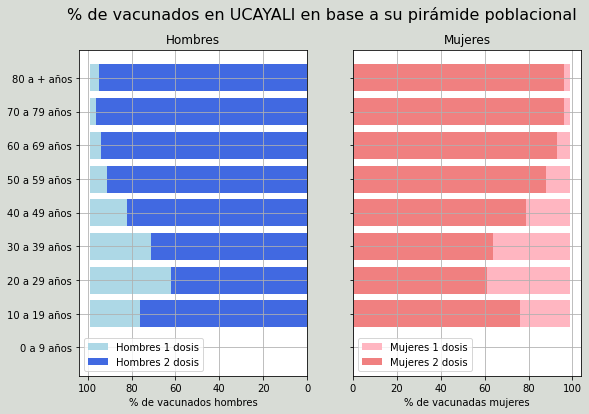

In [18]:
for g in range(len(REGIONES)-1):   
    #DEFINIMOS X Y LÍMITES
    y = range(0, len(REGIONES_DF2[g]))
    x_male_2_dosis = REGIONES_DF2[g].PORCENTAJE_HOMBRES_2_DOSIS_ARREGLO
    x_female_2_dosis = REGIONES_DF2[g].PORCENTAJE_MUJERES_2_DOSIS_ARREGLO
    x_male_1_dosis = REGIONES_DF2[g].PORCENTAJE_HOMBRES_1_DOSIS_ARREGLO
    x_female_1_dosis = REGIONES_DF2[g].PORCENTAJE_MUJERES_1_DOSIS_ARREGLO
    
    #DEFINIMOS LOS PARÁMETROS DEL PLOT
    fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))
    fig.suptitle('% de vacunados en ' + REGIONES_DF[g] + ' en base a su pirámide poblacional', fontsize=16)
    #ESPECIFICAMOS EL COLOR DE ATRÁS Y EL TÍTULO
    fig.patch.set_facecolor('xkcd:light grey')
    #plt.figtext(.5,.9,REGIONES_DF[g], fontsize=15, ha='center')

    #DEFINE BARRAS DE HOMBRES Y MUJERES
    axes[0].barh(y, x_male_1_dosis, align='center', color='lightblue',label ='Hombres 1 dosis',  left=x_male_2_dosis)
    axes[0].barh(y, x_male_2_dosis, align='center', color='royalblue',label ='Hombres 2 dosis')

    axes[0].set(title='Hombres')
    axes[1].barh(y, x_female_1_dosis, align='center', color='lightpink',label ='Mujeres 1 dosis',  left=x_female_2_dosis)
    axes[1].barh(y, x_female_2_dosis, align='center', color='lightcoral',label ='Mujeres 2 dosis')

    axes[1].set(title='Mujeres')

    #CONFIGURA LA GRILLA, LABELS Y EJE Y
    axes[0].legend()
    axes[1].legend()  
    axes[1].grid()
    axes[0].set(yticks=y, yticklabels=EDADES_ARREGLO)
    axes[0].invert_xaxis()
    axes[0].grid()
    axes[0].set_xlabel('% de vacunados hombres')  
    axes[1].set_xlabel('% de vacunadas mujeres') 
    #PLOTEAR
    plt.show()

# USAMOS UN GRÁFICO DEL MAPA DEL PERÚ PARA MOSTRAR EL AVANCE EN PORCENTAJE DE LA POBLACIÓN VACUNADA POR REGIÓN (EN ESTE CASO POR 2 DOSIS) A TRAVÉS DE UN MAPA DE CALOR

{'AMAZONAS_dic': 43.37452167422905, 'ANCASH_dic': 60.9766064469844, 'APURIMAC_dic': 52.415834194013144, 'AREQUIPA_dic': 55.80452219264076, 'AYACUCHO_dic': 41.15640469863047, 'CAJAMARCA_dic': 46.33812247578841, 'CALLAO_dic': 66.73384097823185, 'CUSCO_dic': 49.15436912260666, 'HUANCAVELICA_dic': 49.30153576692227, 'HUANUCO_dic': 38.17107578248545, 'ICA_dic': 58.38830087669753, 'JUNIN_dic': 55.79174507003234, 'LA_LIBERTAD_dic': 53.28472280014614, 'LAMBAYEQUE_dic': 49.92869752328216, 'LIMA_dic': 57.74050612450826, 'LORETO_dic': 30.028424684634217, 'MADRE_DE_DIOS_dic': 29.464877346809008, 'MOQUEGUA_dic': 60.38439014002023, 'PASCO_dic': 53.89014730186751, 'PIURA_dic': 40.28894824952308, 'PUNO_dic': 29.81089355502397, 'SAN_MARTIN_dic': 44.79270276519448, 'TACNA_dic': 60.54359467419614, 'TUMBES_dic': 55.20116426458852, 'UCAYALI_dic': 37.183248415978255}


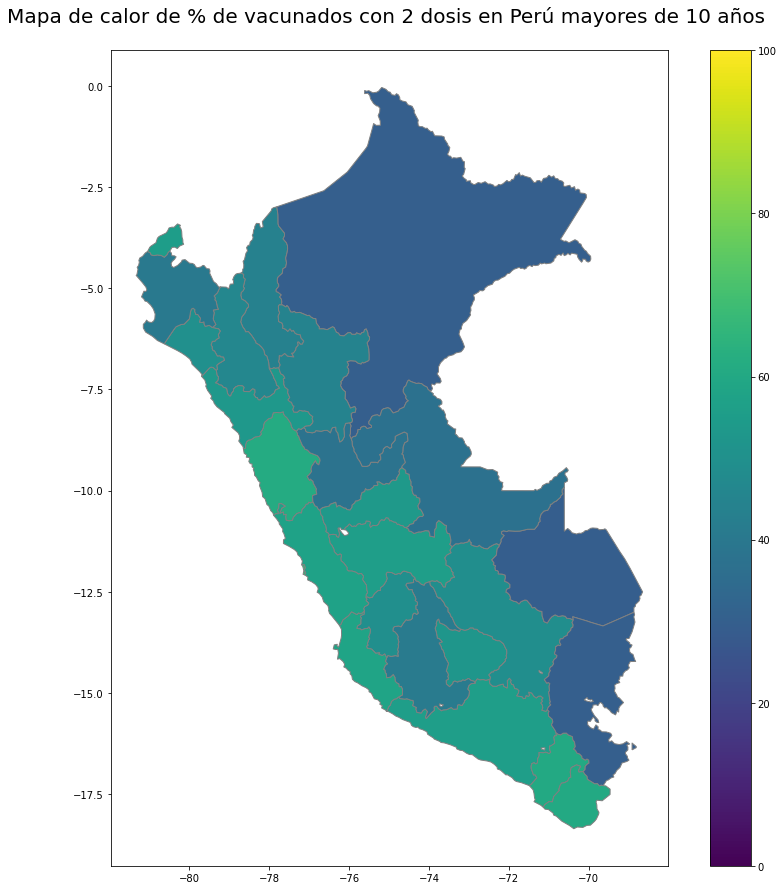

AMAZONAS_dic         43.374522
ANCASH_dic           60.976606
APURIMAC_dic         52.415834
AREQUIPA_dic         55.804522
AYACUCHO_dic         41.156405
CAJAMARCA_dic        46.338122
CALLAO_dic           66.733841
CUSCO_dic            49.154369
HUANCAVELICA_dic     49.301536
HUANUCO_dic          38.171076
ICA_dic              58.388301
JUNIN_dic            55.791745
LA_LIBERTAD_dic      53.284723
LAMBAYEQUE_dic       49.928698
LIMA_dic             57.740506
LORETO_dic           30.028425
MADRE_DE_DIOS_dic    29.464877
MOQUEGUA_dic         60.384390
PASCO_dic            53.890147
PIURA_dic            40.288948
PUNO_dic             29.810894
SAN_MARTIN_dic       44.792703
TACNA_dic            60.543595
TUMBES_dic           55.201164
UCAYALI_dic          37.183248
dtype: float64


In [19]:
AMAZONAS_PORCENTAJE_2=0
ANCASH_PORCENTAJE_2=0
APURIMAC_PORCENTAJE_2=0
AREQUIPA_PORCENTAJE_2=0
AYACUCHO_PORCENTAJE_2=0
CAJAMARCA_PORCENTAJE_2=0
CALLAO_PORCENTAJE_2=0
CUSCO_PORCENTAJE_2=0
HUANCAVELICA_PORCENTAJE_2=0
HUANUCO_PORCENTAJE_2=0
ICA_PORCENTAJE_2=0
JUNIN_PORCENTAJE_2=0
LA_LIBERTAD_PORCENTAJE_2=0
LAMBAYEQUE_PORCENTAJE_2=0
LIMA_PORCENTAJE_2=0
LORETO_PORCENTAJE_2=0
MADRE_DE_DIOS_PORCENTAJE_2=0
MOQUEGUA_PORCENTAJE_2=0
PASCO_PORCENTAJE_2=0
PIURA_PORCENTAJE_2=0
PUNO_PORCENTAJE_2=0
SAN_MARTIN_PORCENTAJE_2=0
TACNA_PORCENTAJE_2=0
TUMBES_PORCENTAJE_2=0
UCAYALI_PORCENTAJE_2=0

porcentaje_2_dosis =[AMAZONAS_PORCENTAJE_2, ANCASH_PORCENTAJE_2, APURIMAC_PORCENTAJE_2, AREQUIPA_PORCENTAJE_2, AYACUCHO_PORCENTAJE_2, CAJAMARCA_PORCENTAJE_2, CALLAO_PORCENTAJE_2, CUSCO_PORCENTAJE_2, HUANCAVELICA_PORCENTAJE_2, HUANUCO_PORCENTAJE_2, ICA_PORCENTAJE_2, JUNIN_PORCENTAJE_2, LA_LIBERTAD_PORCENTAJE_2, LAMBAYEQUE_PORCENTAJE_2, LIMA_PORCENTAJE_2, LORETO_PORCENTAJE_2, MADRE_DE_DIOS_PORCENTAJE_2, MOQUEGUA_PORCENTAJE_2, PASCO_PORCENTAJE_2, PIURA_PORCENTAJE_2, PUNO_PORCENTAJE_2, SAN_MARTIN_PORCENTAJE_2, TACNA_PORCENTAJE_2, TUMBES_PORCENTAJE_2, UCAYALI_PORCENTAJE_2]

for u in range(len(REGIONES)):
    arreglo_porcentaje=REGIONES_DF2[u]
    total_2_dosis_region=arreglo_porcentaje['TOTAL_2_DOSIS'].sum()
    total_region=arreglo_porcentaje['TOTAL_PERSONAS'].sum()-arreglo_porcentaje['TOTAL_PERSONAS'][0]
    porciento=total_2_dosis_region*100/total_region
    porcentaje_2_dosis[u]=(porciento)

porcentaje_2_dosis_dic =["AMAZONAS_dic", "ANCASH_dic","APURIMAC_dic", "AREQUIPA_dic", "AYACUCHO_dic", "CAJAMARCA_dic",
"CALLAO_dic","CUSCO_dic","HUANCAVELICA_dic","HUANUCO_dic", "ICA_dic", "JUNIN_dic", "LA_LIBERTAD_dic", "LAMBAYEQUE_dic","LIMA_dic","LORETO_dic", "MADRE_DE_DIOS_dic","MOQUEGUA_dic", "PASCO_dic", 
"PIURA_dic","PUNO_dic", "SAN_MARTIN_dic", "TACNA_dic", "TUMBES_dic", "UCAYALI_dic"]
diccionario_porcentajes=dict(zip(porcentaje_2_dosis_dic,porcentaje_2_dosis))                    
print(diccionario_porcentajes)

region_geojson["PORCENTAJE_2_DOSIS"] = porcentaje_2_dosis
ax = region_geojson.plot(column='PORCENTAJE_2_DOSIS',figsize=(15, 15),legend=True,edgecolor=u'gray', norm=colors.Normalize(vmin=0, vmax=100))

ax.set_title('Mapa de calor de % de vacunados con 2 dosis en Perú mayores de 10 años \n', fontsize=20) 
plt.show()

result_series = pd.Series(diccionario_porcentajes) 
print(result_series)
#ax.text(region_geojson[1]['centro'].x,
#            region_geojsonregion_geojson[1]['centro'].y,
#            region_geojson[1]['NOMBPROV'],
#            horizontalalignment='center',
#            fontsize=19,
#            bbox=props,
#            color='#152650', 
#            fontweight='bold'),
#region_geojson['centro']=region_geojson['geometry'].centroid
#ax.text(region_geojson["centro"].x, region_geojson["centro"].y, region_geojson['NOMBDEP'])

# GRAFICAMOS EL AVANCE DE INMUNIZACIÓN TOTAL (2 DOSIS COMPLETAS) POR CADA UNO DE LOS RANGOS DE EDAD POR CADA REGIÓN A TRAVÉS DE MAPAS DE CALOR.

0 a 9 años
AMAZONAS_dic         0
ANCASH_dic           0
APURIMAC_dic         0
AREQUIPA_dic         0
AYACUCHO_dic         0
CAJAMARCA_dic        0
CALLAO_dic           0
CUSCO_dic            0
HUANCAVELICA_dic     0
HUANUCO_dic          0
ICA_dic              0
JUNIN_dic            0
LA_LIBERTAD_dic      0
LAMBAYEQUE_dic       0
LIMA_dic             0
LORETO_dic           0
MADRE_DE_DIOS_dic    0
MOQUEGUA_dic         0
PASCO_dic            0
PIURA_dic            0
PUNO_dic             0
SAN_MARTIN_dic       0
TACNA_dic            0
TUMBES_dic           0
UCAYALI_dic          0
dtype: int64


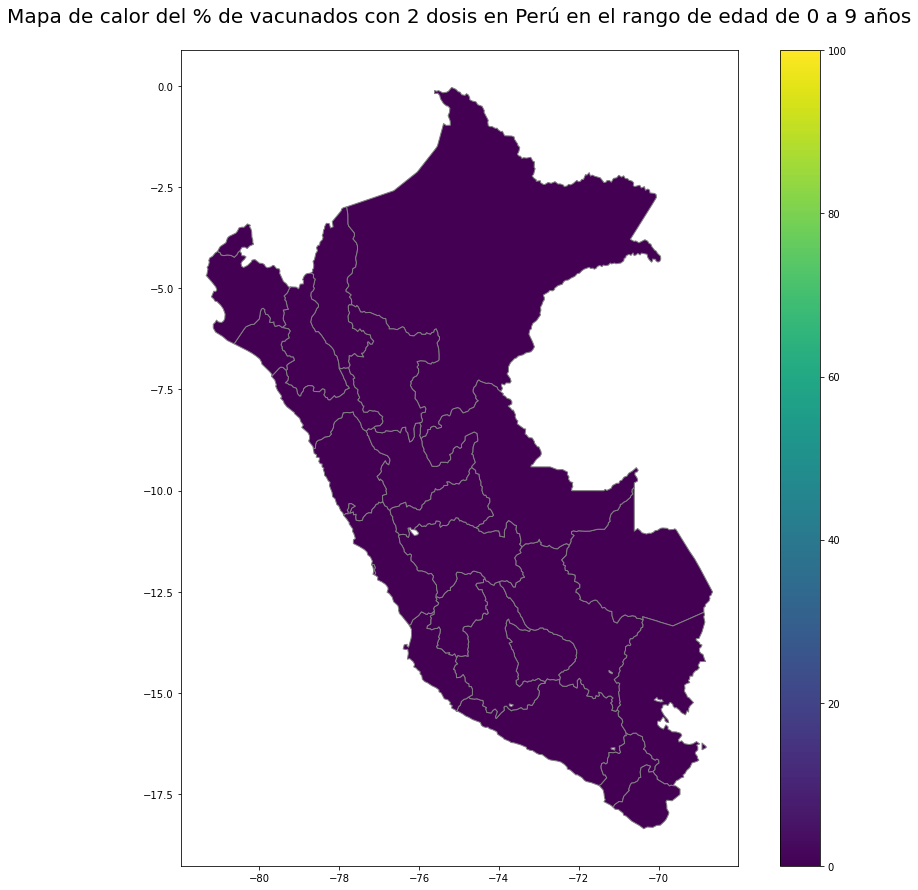

10 a 19 años
AMAZONAS_dic         42
ANCASH_dic           48
APURIMAC_dic         21
AREQUIPA_dic         35
AYACUCHO_dic         34
CAJAMARCA_dic        39
CALLAO_dic           12
CUSCO_dic            78
HUANCAVELICA_dic     59
HUANUCO_dic          28
ICA_dic              11
JUNIN_dic            33
LA_LIBERTAD_dic      70
LAMBAYEQUE_dic       13
LIMA_dic             21
LORETO_dic           47
MADRE_DE_DIOS_dic    36
MOQUEGUA_dic         75
PASCO_dic            26
PIURA_dic            11
PUNO_dic             35
SAN_MARTIN_dic       27
TACNA_dic            58
TUMBES_dic           76
UCAYALI_dic          69
dtype: int64


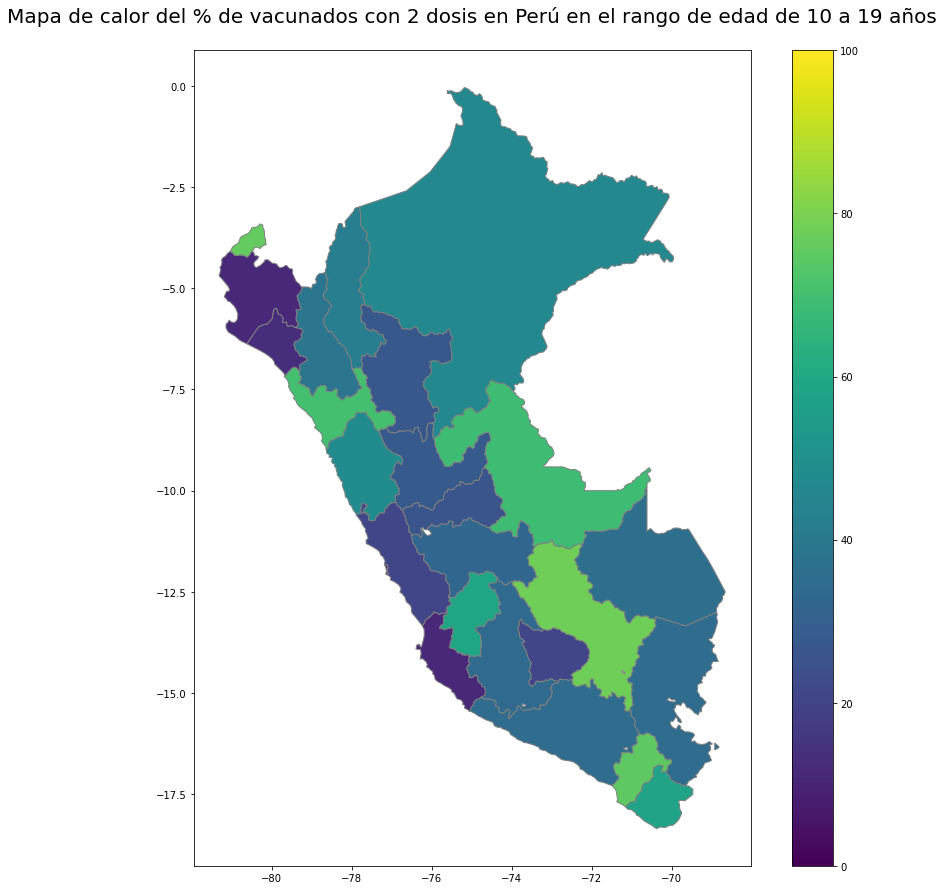

20 a 29 años
AMAZONAS_dic         57
ANCASH_dic           72
APURIMAC_dic         54
AREQUIPA_dic         64
AYACUCHO_dic         52
CAJAMARCA_dic        48
CALLAO_dic           54
CUSCO_dic            28
HUANCAVELICA_dic     63
HUANUCO_dic          52
ICA_dic              56
JUNIN_dic            71
LA_LIBERTAD_dic      72
LAMBAYEQUE_dic       59
LIMA_dic             48
LORETO_dic           23
MADRE_DE_DIOS_dic    41
MOQUEGUA_dic         68
PASCO_dic            70
PIURA_dic            17
PUNO_dic             51
SAN_MARTIN_dic       43
TACNA_dic            77
TUMBES_dic           61
UCAYALI_dic          71
dtype: int64


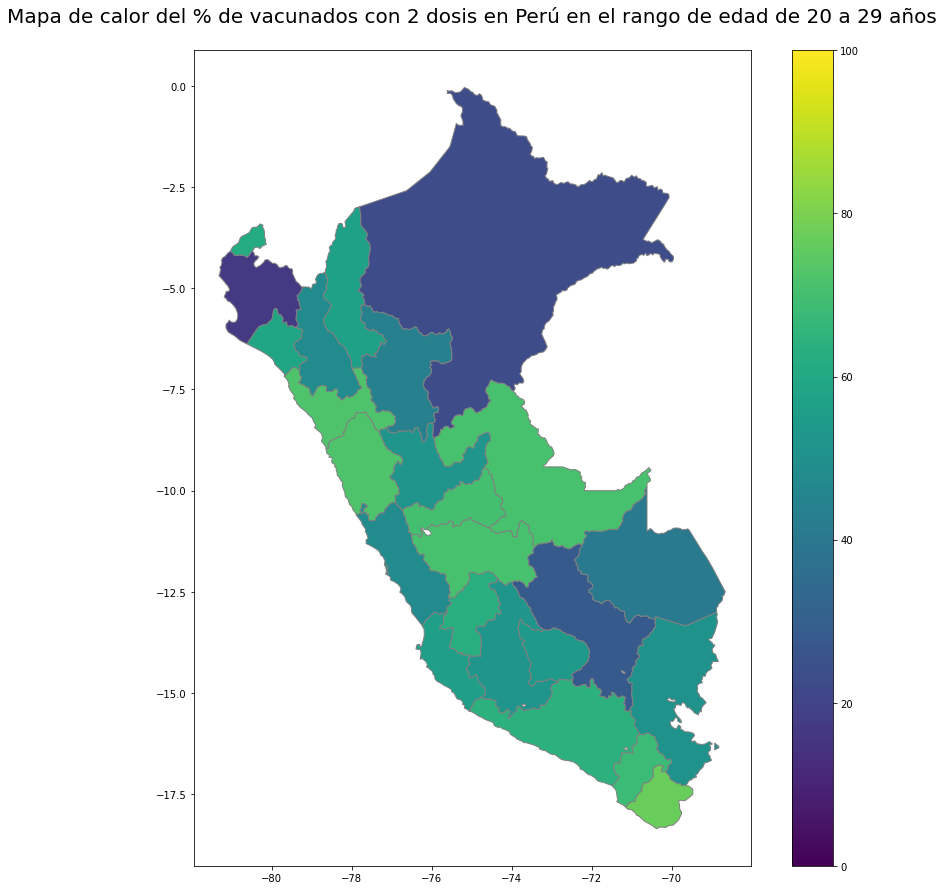

30 a 39 años
AMAZONAS_dic         73
ANCASH_dic           83
APURIMAC_dic         67
AREQUIPA_dic         73
AYACUCHO_dic         68
CAJAMARCA_dic        73
CALLAO_dic           82
CUSCO_dic            71
HUANCAVELICA_dic     79
HUANUCO_dic          66
ICA_dic              83
JUNIN_dic            83
LA_LIBERTAD_dic      82
LAMBAYEQUE_dic       73
LIMA_dic             78
LORETO_dic           65
MADRE_DE_DIOS_dic    52
MOQUEGUA_dic         76
PASCO_dic            84
PIURA_dic            67
PUNO_dic             61
SAN_MARTIN_dic       73
TACNA_dic            83
TUMBES_dic           68
UCAYALI_dic          77
dtype: int64


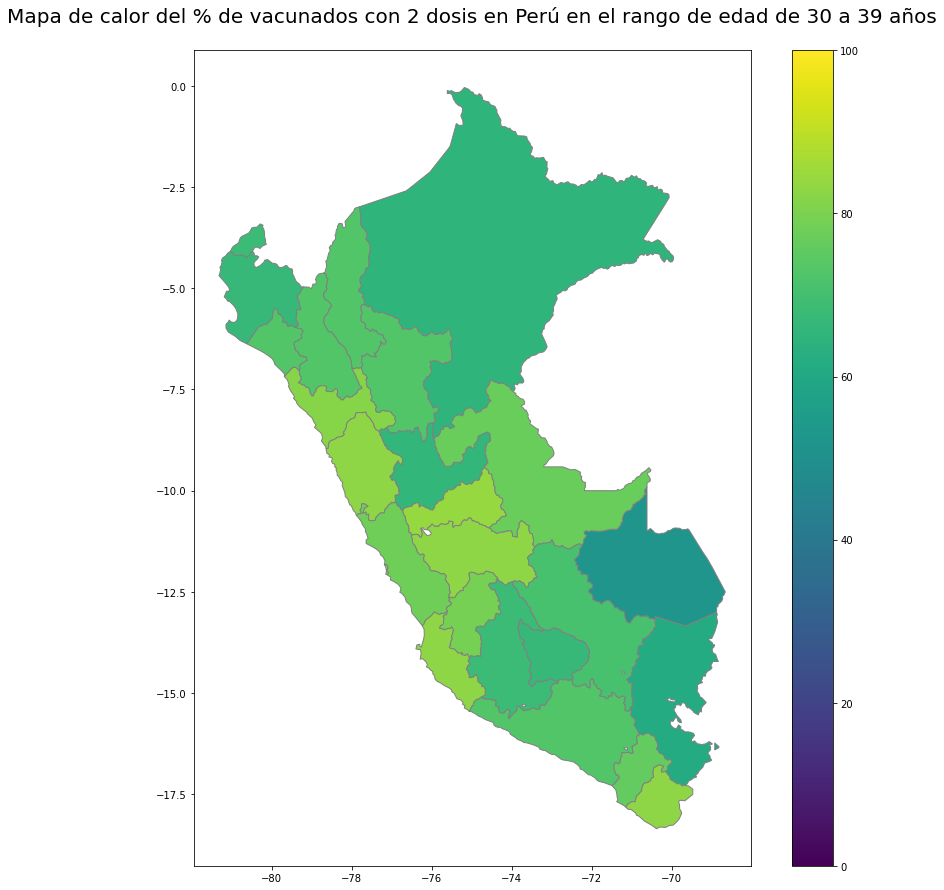

40 a 49 años
AMAZONAS_dic         86
ANCASH_dic           89
APURIMAC_dic         81
AREQUIPA_dic         85
AYACUCHO_dic         80
CAJAMARCA_dic        85
CALLAO_dic           93
CUSCO_dic            86
HUANCAVELICA_dic     83
HUANUCO_dic          76
ICA_dic              93
JUNIN_dic            89
LA_LIBERTAD_dic      90
LAMBAYEQUE_dic       82
LIMA_dic             91
LORETO_dic           77
MADRE_DE_DIOS_dic    74
MOQUEGUA_dic         88
PASCO_dic            92
PIURA_dic            86
PUNO_dic             72
SAN_MARTIN_dic       87
TACNA_dic            89
TUMBES_dic           80
UCAYALI_dic          80
dtype: int64


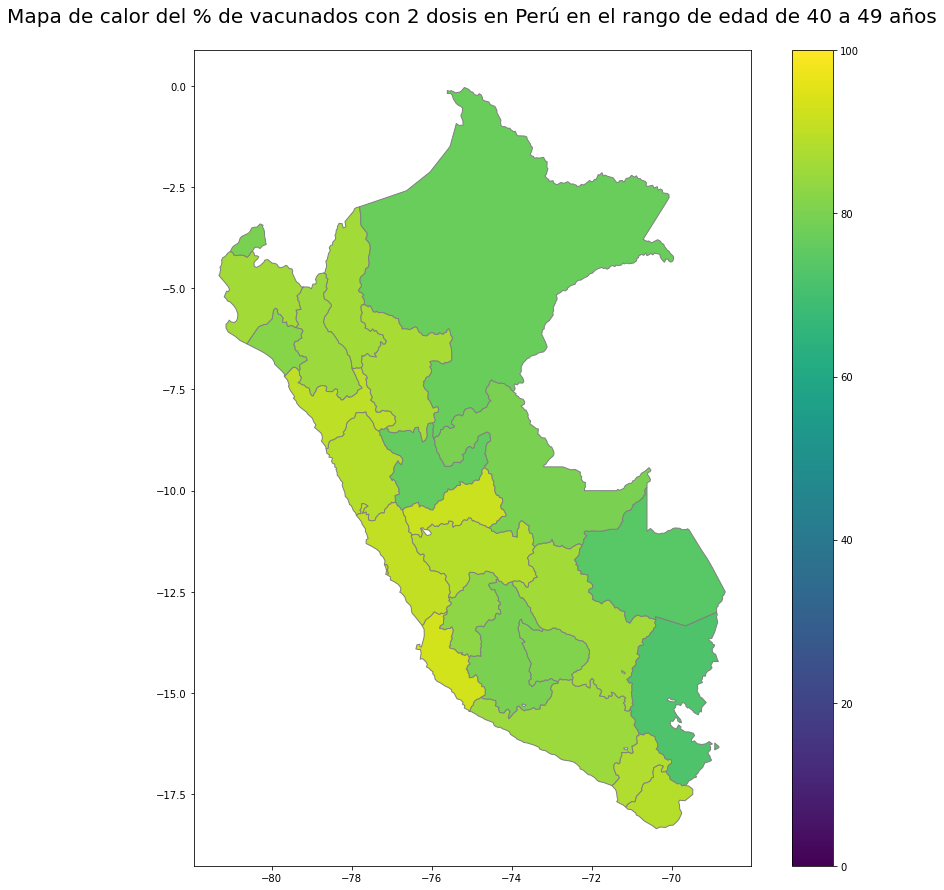

50 a 59 años
AMAZONAS_dic         89
ANCASH_dic           94
APURIMAC_dic         88
AREQUIPA_dic         92
AYACUCHO_dic         86
CAJAMARCA_dic        89
CALLAO_dic           94
CUSCO_dic            89
HUANCAVELICA_dic     84
HUANUCO_dic          81
ICA_dic              96
JUNIN_dic            93
LA_LIBERTAD_dic      94
LAMBAYEQUE_dic       91
LIMA_dic             95
LORETO_dic           83
MADRE_DE_DIOS_dic    83
MOQUEGUA_dic         94
PASCO_dic            94
PIURA_dic            91
PUNO_dic             77
SAN_MARTIN_dic       90
TACNA_dic            93
TUMBES_dic           89
UCAYALI_dic          84
dtype: int64


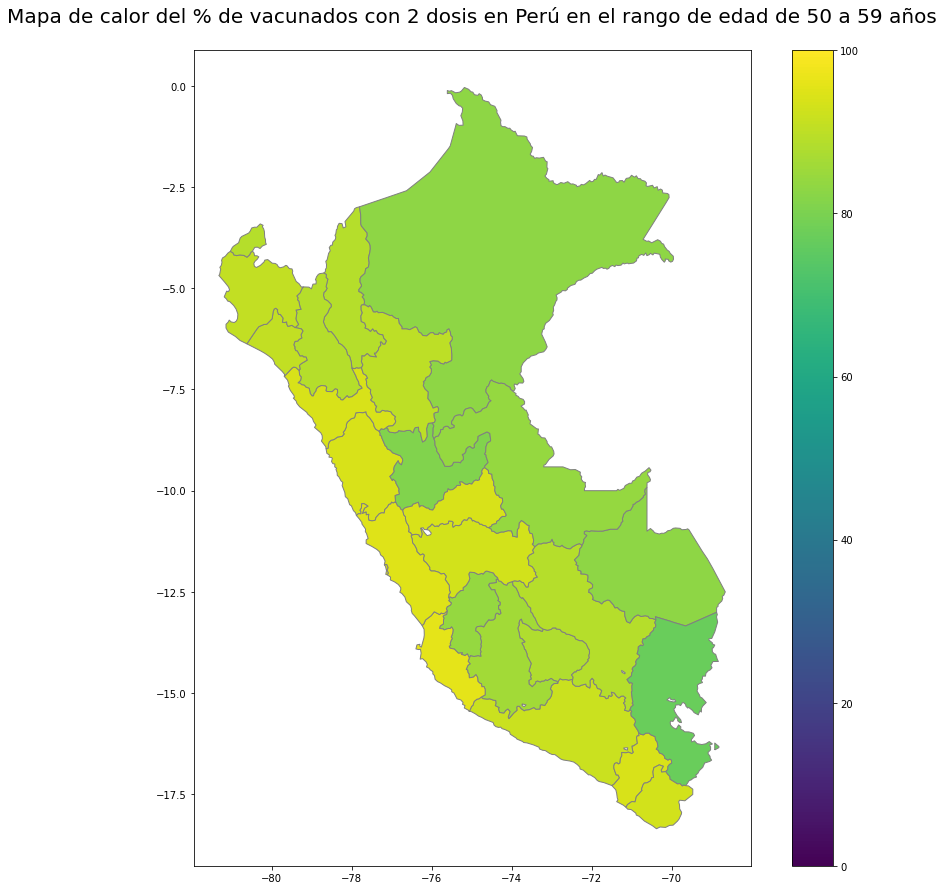

60 a 69 años
AMAZONAS_dic         92
ANCASH_dic           96
APURIMAC_dic         93
AREQUIPA_dic         94
AYACUCHO_dic         89
CAJAMARCA_dic        92
CALLAO_dic           96
CUSCO_dic            93
HUANCAVELICA_dic     90
HUANUCO_dic          87
ICA_dic              97
JUNIN_dic            95
LA_LIBERTAD_dic      96
LAMBAYEQUE_dic       95
LIMA_dic             96
LORETO_dic           87
MADRE_DE_DIOS_dic    87
MOQUEGUA_dic         96
PASCO_dic            96
PIURA_dic            94
PUNO_dic             84
SAN_MARTIN_dic       93
TACNA_dic            96
TUMBES_dic           94
UCAYALI_dic          91
dtype: int64


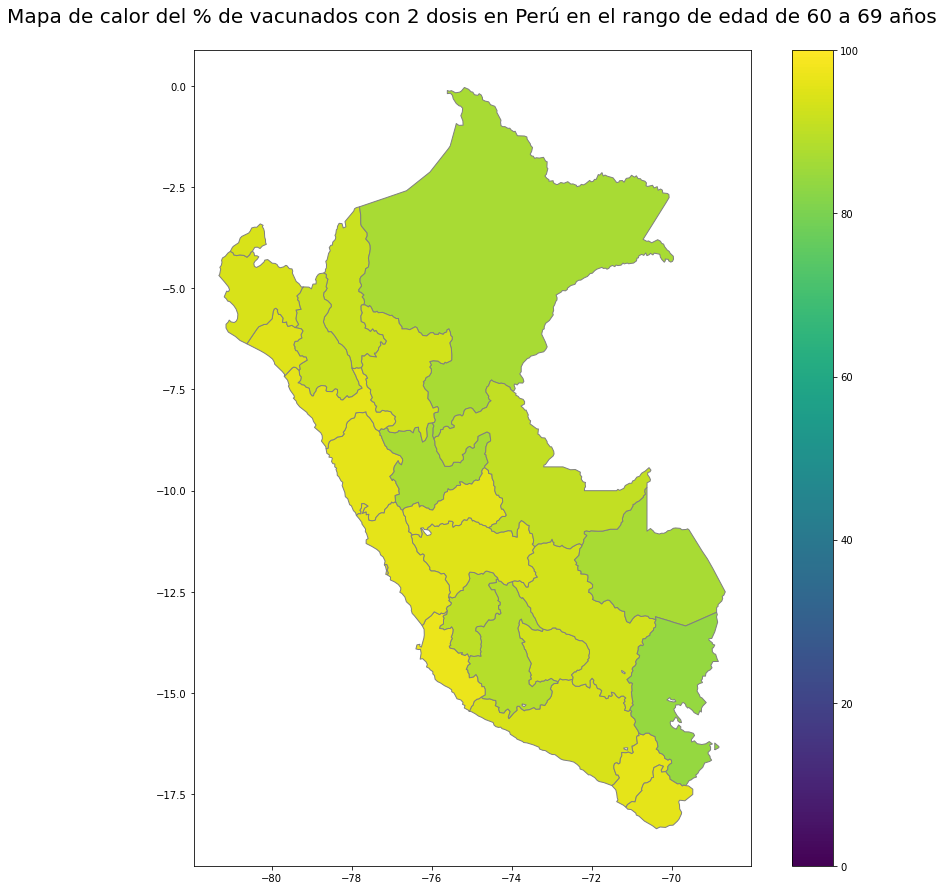

70 a 79 años
AMAZONAS_dic         93
ANCASH_dic           97
APURIMAC_dic         95
AREQUIPA_dic         96
AYACUCHO_dic         92
CAJAMARCA_dic        94
CALLAO_dic           98
CUSCO_dic            95
HUANCAVELICA_dic     93
HUANUCO_dic          90
ICA_dic              98
JUNIN_dic            96
LA_LIBERTAD_dic      97
LAMBAYEQUE_dic       95
LIMA_dic             95
LORETO_dic           88
MADRE_DE_DIOS_dic    91
MOQUEGUA_dic         97
PASCO_dic            96
PIURA_dic            94
PUNO_dic             85
SAN_MARTIN_dic       93
TACNA_dic            97
TUMBES_dic           96
UCAYALI_dic          90
dtype: int64


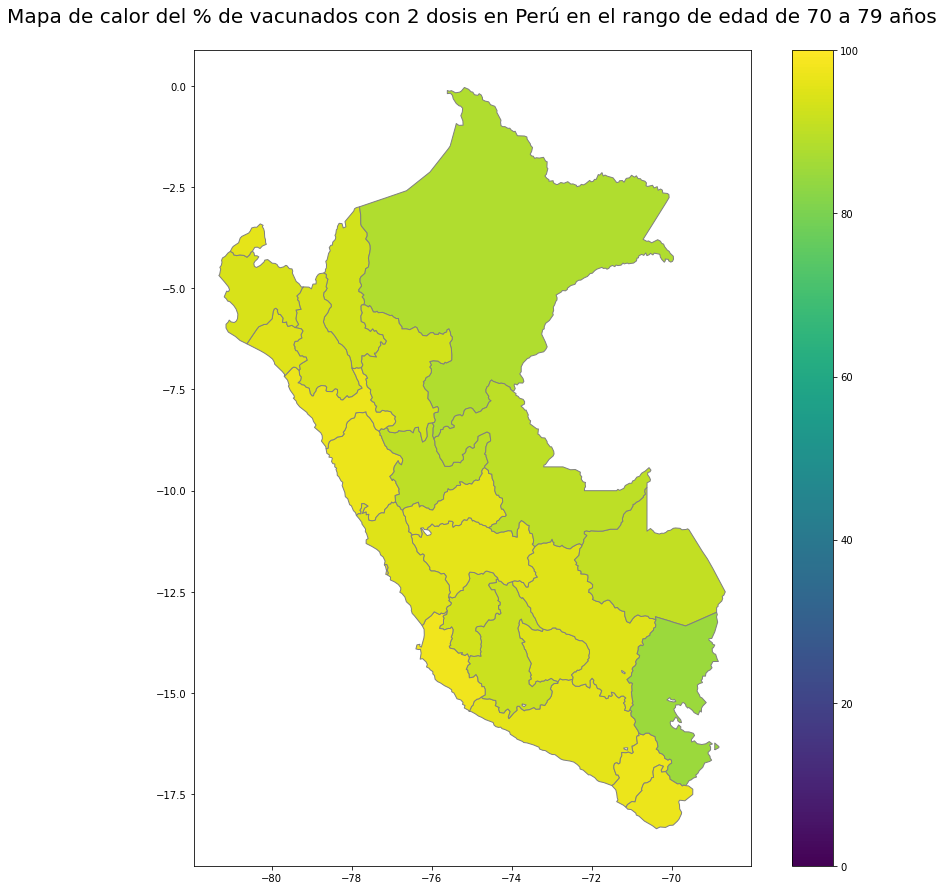

80 a + años
AMAZONAS_dic         94
ANCASH_dic           96
APURIMAC_dic         94
AREQUIPA_dic         96
AYACUCHO_dic         92
CAJAMARCA_dic        93
CALLAO_dic           95
CUSCO_dic            94
HUANCAVELICA_dic     93
HUANUCO_dic          90
ICA_dic              96
JUNIN_dic            95
LA_LIBERTAD_dic      96
LAMBAYEQUE_dic       94
LIMA_dic             96
LORETO_dic           86
MADRE_DE_DIOS_dic    86
MOQUEGUA_dic         96
PASCO_dic            94
PIURA_dic            94
PUNO_dic             83
SAN_MARTIN_dic       93
TACNA_dic            96
TUMBES_dic           95
UCAYALI_dic          90
dtype: int64


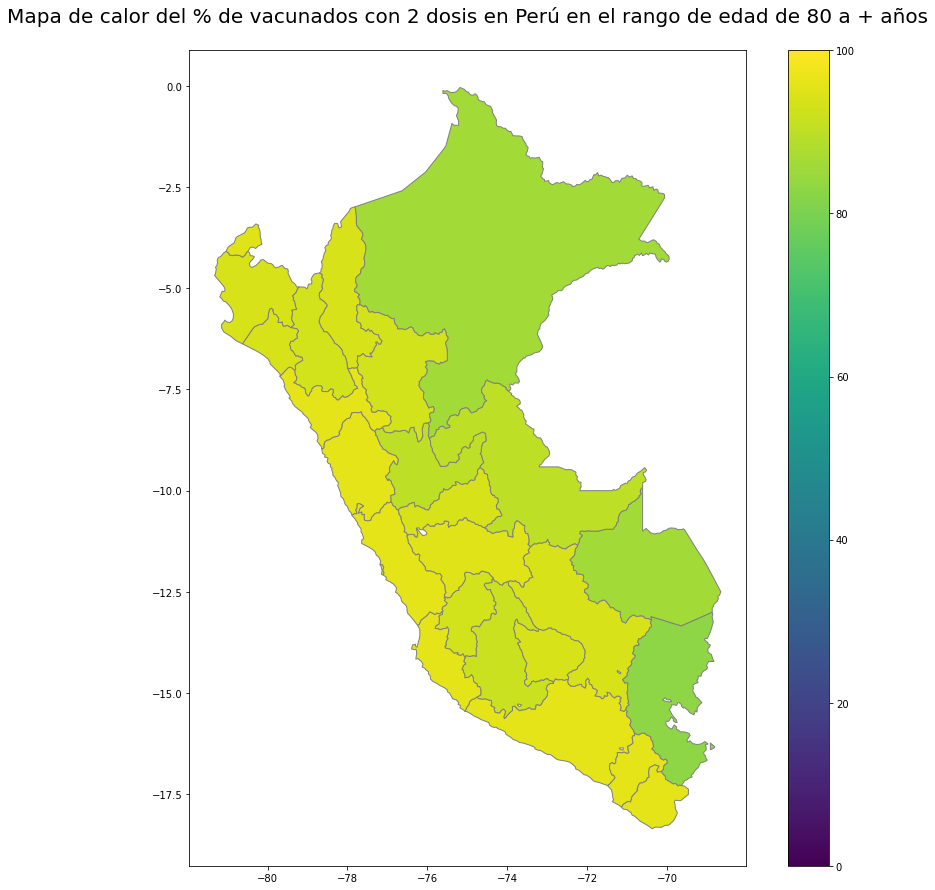

In [20]:
for z in range(len(EDADES_ARREGLO)):

    for u in range(len(REGIONES)):
        arreglo_porcentaje=REGIONES_DF2[u]
        total_2_dosis_region=arreglo_porcentaje.loc[EDADES_ARREGLO[z],'PORCENTAJE_TOTAL_2_DOSIS_ARREGLO']
        porciento=total_2_dosis_region
        #total_2_dosis_region=arreglo_porcentaje.loc[EDADES_ARREGLO[z],'TOTAL_2_DOSIS']
        #total_region=arreglo_porcentaje.loc[EDADES_ARREGLO[z],'TOTAL_PERSONAS']        
        #porciento=total_2_dosis_region*100/total_region
        #if porciento >= 100:
        #    porciento =99
        porcentaje_2_dosis[u]=(porciento)
        
        
    region_geojson["PORCENTAJE_2_DOSIS"] = porcentaje_2_dosis
    print(EDADES_ARREGLO[z])
    diccionario_porcentajes=dict(zip(porcentaje_2_dosis_dic,porcentaje_2_dosis))                    
    #print(diccionario_porcentajes)
    result_series = pd.Series(diccionario_porcentajes) 
    print(result_series)
    #bins = [0, 100]
    
    # Use a boundary norm instead
    #cmap = ListedColormap(['r', 'g', 'b'])
    #boundary_norm = BoundaryNorm([0, 33, 66, 100], cmap.N)
    
    
    ax = region_geojson.plot(column='PORCENTAJE_2_DOSIS',figsize=(15, 15),legend=True,edgecolor=u'gray', norm=colors.Normalize(vmin=0, vmax=100) )
    ax.set_title('Mapa de calor del % de vacunados con 2 dosis en Perú en el rango de edad de ' + EDADES_ARREGLO[z] + '\n', fontsize=20) 
    plt.show()


In [21]:
LIMA

,TOTAL_2_DOSIS,TOTAL_1_DOSIS,N_HOMBRES_2_DOSIS,N_MUJERES_2_DOSIS,N_HOMBRES_1_DOSIS,N_MUJERES_1_DOSIS,PORCENTAJE_HOMBRES_2_DOSIS_ARREGLO,PORCENTAJE_MUJERES_2_DOSIS_ARREGLO,PORCENTAJE_HOMBRES_1_DOSIS_ARREGLO,PORCENTAJE_MUJERES_1_DOSIS_ARREGLO,PORCENTAJE_TOTAL_2_DOSIS_ARREGLO,PORCENTAJE_TOTAL_1_DOSIS_ARREGLO,TOTAL_HOMBRES_ARREGLO,TOTAL_MUJERES_ARREGLO,TOTAL_PERSONAS
EDADES_REGION,,,,,,,,,,,,,,,
0 a 9 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10 a 19 años,29334,107682,10822,18512,55779,51903,16,26,83,73,21,78,665923,711533,1377456
20 a 29 años,627692,659908,329486,298206,340323,319585,49,48,50,51,48,51,798473,950337,1748810
30 a 39 años,1154979,310131,608820,546159,148970,161161,80,77,19,22,78,21,848999,869481,1718480
40 a 49 años,1267734,119269,660418,607316,54686,64583,92,90,7,9,91,8,760892,822481,1583373
50 a 59 años,1031395,50293,537523,493872,24316,25977,95,95,4,4,95,4,624845,665396,1290241
60 a 69 años,713587,27789,377783,335804,14605,13184,96,96,3,3,96,3,419470,469722,889192
70 a 79 años,405099,16896,216587,188512,8827,8069,96,95,3,4,95,4,264212,277453,541665
80 a + años,217786,7130,126705,91081,3983,3147,96,96,3,3,96,3,129207,156211,285418


# EVALUAREMOS EL AVANCE DE LA VACUNACIÓN A NIVEL NACIONAL

In [22]:

PERU=df_por_region_INDEXADO.copy()
PERU


,TOTAL_2_DOSIS,TOTAL_1_DOSIS,N_HOMBRES_2_DOSIS,N_MUJERES_2_DOSIS,N_HOMBRES_1_DOSIS,N_MUJERES_1_DOSIS,PORCENTAJE_HOMBRES_2_DOSIS_ARREGLO,PORCENTAJE_MUJERES_2_DOSIS_ARREGLO,PORCENTAJE_HOMBRES_1_DOSIS_ARREGLO,PORCENTAJE_MUJERES_1_DOSIS_ARREGLO,PORCENTAJE_TOTAL_2_DOSIS_ARREGLO,PORCENTAJE_TOTAL_1_DOSIS_ARREGLO,TOTAL_HOMBRES_ARREGLO,TOTAL_MUJERES_ARREGLO,TOTAL_PERSONAS
EDADES_REGION,,,,,,,,,,,,,,,
0 a 9 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10 a 19 años,6446,2829,3592,2854,1543,1286,0,0,0,0,0,0,0,0,0
20 a 29 años,33086,13251,18532,14554,7002,6249,0,0,0,0,0,0,0,0,0
30 a 39 años,39760,11732,21563,18197,5635,6097,0,0,0,0,0,0,0,0,0
40 a 49 años,33482,8040,17267,16215,3632,4408,0,0,0,0,0,0,0,0,0
50 a 59 años,28913,5414,14391,14522,2357,3057,0,0,0,0,0,0,0,0,0
60 a 69 años,21256,2032,9762,11494,828,1204,0,0,0,0,0,0,0,0,0
70 a 79 años,9773,967,4386,5387,424,543,0,0,0,0,0,0,0,0,0
80 a + años,3456,351,1740,1716,162,189,0,0,0,0,0,0,0,0,0


In [23]:
for j in [2,1]:   #Usamos 1 y 2 por la cantidad de dosis aplicadas hasta la fecha
    for i in range(9):
        if j == 2 :          
            total = vacunas.loc[(vacunas.EDAD >= EDADES_TRAMA[2*i]) & (vacunas.EDAD <= EDADES_TRAMA[2*i+1]) & (vacunas.DOSIS == j)]
            femenino = vacunas.loc[(vacunas.EDAD >= EDADES_TRAMA[2*i]) & (vacunas.EDAD <= EDADES_TRAMA[2*i+1]) & (vacunas.DOSIS == j)& (vacunas.SEXO == 'MASCULINO')]
            masculino = vacunas.loc[(vacunas.EDAD >= EDADES_TRAMA[2*i]) & (vacunas.EDAD <= EDADES_TRAMA[2*i+1]) & (vacunas.DOSIS == j)& (vacunas.SEXO == 'FEMENINO')]
            total_t=total.count()  #a.count() es una serie
            masculino_t=masculino.count()
            femenino_t=femenino.count()
            PERU.iat[i,j-2]=total_t[0]
            PERU.iat[i,j]=masculino_t[0]
            PERU.iat[i,j+1]=femenino_t[0]
        if j == 1 :          
            total = vacunas.loc[(vacunas.EDAD >= EDADES_TRAMA[2*i]) & (vacunas.EDAD <= EDADES_TRAMA[2*i+1]) & (vacunas.DOSIS == j)]
            femenino = vacunas.loc[(vacunas.EDAD >= EDADES_TRAMA[2*i]) & (vacunas.EDAD <= EDADES_TRAMA[2*i+1]) & (vacunas.DOSIS == j)& (vacunas.SEXO == 'MASCULINO')]
            masculino = vacunas.loc[(vacunas.EDAD >= EDADES_TRAMA[2*i]) & (vacunas.EDAD <= EDADES_TRAMA[2*i+1]) & (vacunas.DOSIS == j)& (vacunas.SEXO == 'FEMENINO')]
            total_t=total.count()  #a.count() es una serie
            masculino_t=masculino.count()
            femenino_t=femenino.count()
            PERU.iat[i,j]=abs(total_t[0] - PERU.iat[i,j-1])
            PERU.iat[i,4*j]=abs(masculino_t[0]-PERU.iat[i,2*j])
            PERU.iat[i,4*j+1]=abs(femenino_t[0]-PERU.iat[i,2*j+1])            

            
            
for t in range(len(EDADES_ARREGLO)):
    if (t != 8 and t!=0):
        PERU.iat[t,14]=INEI_TOTALES.iloc[2*t+1,3] + INEI_TOTALES.iloc[2*t+2,3]
        PERU.iat[t,13]=INEI_TOTALES.iloc[2*t+1,1] + INEI_TOTALES.iloc[2*t+2,1]
        PERU.iat[t,12]=INEI_TOTALES.iloc[2*t+1,2] + INEI_TOTALES.iloc[2*t+2,2] 

        PERU.iat[t,10]=(PERU.iloc[t,0]*100)/(PERU.iloc[t,0]+PERU.iloc[t,1])      #%total_2_dosis
        PERU.iat[t,11]=(PERU.iloc[t,1]*100)/(PERU.iloc[t,0]+PERU.iloc[t,1])      #%total_1_dosis
        PERU.iat[t,6]=(PERU.iloc[t,2]*100)/(PERU.iloc[t,2]+PERU.iloc[t,4])       #%hombres 2 dosis
        PERU.iat[t,7]=(PERU.iloc[t,3]*100)/(PERU.iloc[t,3]+PERU.iloc[t,5])       #%mujeres 2 dosis
        PERU.iat[t,8]=(PERU.iloc[t,4]*100)/(PERU.iloc[t,2]+PERU.iloc[t,4])       #%hombres 1 dosis
        PERU.iat[t,9]=(PERU.iloc[t,5]*100)/(PERU.iloc[t,3]+PERU.iloc[t,5])       #%mujeres 1 dosis    
        
#        PERU.iat[t,10]=PERU.iloc[t,0]*100/PERU.iloc[t,14] #%total_2_dosis
#        PERU.iat[t,11]=PERU.iloc[t,1]*100/PERU.iloc[t,14] #%total_1_dosis
#        PERU.iat[t,6]=PERU.iloc[t,2]*100/PERU.iloc[t,12] #%hombres 2 dosis
#        PERU.iat[t,7]=PERU.iloc[t,3]*100/PERU.iloc[t,13] #%mujeres 2 dosis
#        PERU.iat[t,8]=PERU.iloc[t,4]*100/PERU.iloc[t,12] #%hombres 1 dosis
#        PERU.iat[t,9]=PERU.iloc[t,5]*100/PERU.iloc[t,13] #%mujeres 1 dosis     
        
    elif (t == 8):
        PERU.iat[t,14]=INEI_TOTALES.iloc[17,3] + INEI_TOTALES.iloc[18,3]+ INEI_TOTALES.iloc[19,3]+ INEI_TOTALES.iloc[20,3]+ INEI_TOTALES.iloc[21,3]
        PERU.iat[t,13]=INEI_TOTALES.iloc[17:,1].sum()
        PERU.iat[t,12]=INEI_TOTALES.iloc[17:,2].sum()   

        PERU.iat[t,10]=(PERU.iloc[t,0]*100)/(PERU.iloc[t,0]+PERU.iloc[t,1])      #%total_2_dosis
        PERU.iat[t,11]=(PERU.iloc[t,1]*100)/(PERU.iloc[t,0]+PERU.iloc[t,1])      #%total_1_dosis
        PERU.iat[t,6]=(PERU.iloc[t,2]*100)/(PERU.iloc[t,2]+PERU.iloc[t,4])       #%hombres 2 dosis
        PERU.iat[t,7]=(PERU.iloc[t,3]*100)/(PERU.iloc[t,3]+PERU.iloc[t,5])       #%mujeres 2 dosis
        PERU.iat[t,8]=(PERU.iloc[t,4]*100)/(PERU.iloc[t,2]+PERU.iloc[t,4])       #%hombres 1 dosis
        PERU.iat[t,9]=(PERU.iloc[t,5]*100)/(PERU.iloc[t,3]+PERU.iloc[t,5])       #%mujeres 1 dosis            
                   
        
        
        
#        PERU.iat[t,10]=PERU.iloc[t,0]*100/PERU.iloc[t,14] #%total_2_dosis
#        PERU.iat[t,11]=PERU.iloc[t,1]*100/PERU.iloc[t,14] #%total_1_dosis
#        PERU.iat[t,6]=PERU.iloc[t,2]*100/PERU.iloc[t,12] #%hombres 2 dosis
#        PERU.iat[t,7]=PERU.iloc[t,3]*100/PERU.iloc[t,13] #%mujeres 2 dosis
#        PERU.iat[t,8]=PERU.iloc[t,4]*100/PERU.iloc[t,12] #%hombres 1 dosis
#        PERU.iat[t,9]=PERU.iloc[t,5]*100/PERU.iloc[t,13] #%mujeres 1 dosis            





PERU




,TOTAL_2_DOSIS,TOTAL_1_DOSIS,N_HOMBRES_2_DOSIS,N_MUJERES_2_DOSIS,N_HOMBRES_1_DOSIS,N_MUJERES_1_DOSIS,PORCENTAJE_HOMBRES_2_DOSIS_ARREGLO,PORCENTAJE_MUJERES_2_DOSIS_ARREGLO,PORCENTAJE_HOMBRES_1_DOSIS_ARREGLO,PORCENTAJE_MUJERES_1_DOSIS_ARREGLO,PORCENTAJE_TOTAL_2_DOSIS_ARREGLO,PORCENTAJE_TOTAL_1_DOSIS_ARREGLO,TOTAL_HOMBRES_ARREGLO,TOTAL_MUJERES_ARREGLO,TOTAL_PERSONAS
EDADES_REGION,,,,,,,,,,,,,,,
0 a 9 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10 a 19 años,255607,398231,128836,126771,207706,190525,38,39,61,60,39,60,2591369,2615764,5207133
20 a 29 años,1870283,1654198,1005829,864454,854439,799759,54,51,45,48,53,46,2580198,2801406,5381604
30 a 39 años,2964152,901227,1587087,1377065,429951,471276,78,74,21,25,76,23,2590449,2518386,5108835
40 a 49 años,3119372,413949,1638766,1480606,189939,224010,89,86,10,13,88,11,2163608,2120718,4284326
50 a 59 años,2600978,209755,1354542,1246436,97265,112490,93,91,6,8,92,7,1677353,1682059,3359412
60 a 69 años,1869851,104074,969772,900079,50322,53752,95,94,4,5,94,5,1114287,1185891,2300178
70 a 79 años,1077592,52669,564398,513194,26418,26251,95,95,4,4,95,4,640608,683878,1324486
80 a + años,551543,27222,311782,239761,14892,12330,95,95,4,4,95,4,293885,380968,674853


# GRAFICAMOS EL PORCENTAJE DE VACUNADOS EN BASE A LA PIRÁMIDE POBLACIONAL DE TODO EL PERÚ

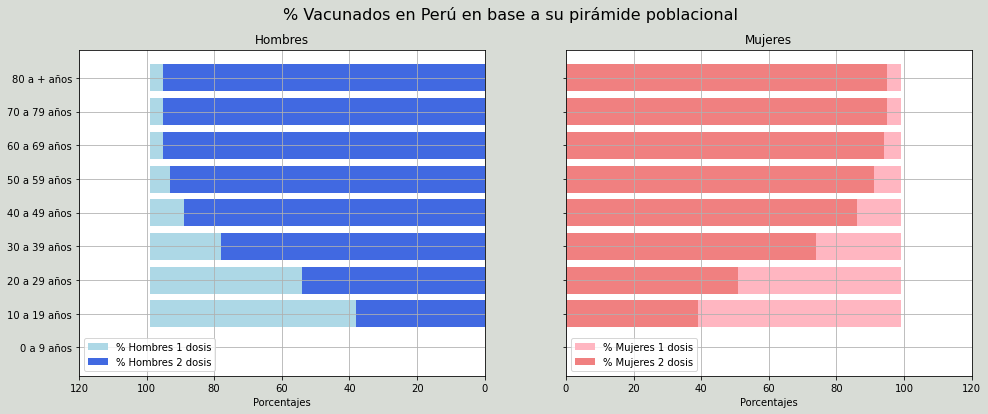

In [24]:
    y = range(0, len(PERU))
    x_male_2_dosis = PERU.PORCENTAJE_HOMBRES_2_DOSIS_ARREGLO
    x_female_2_dosis = PERU.PORCENTAJE_MUJERES_2_DOSIS_ARREGLO
    x_male_1_dosis = PERU.PORCENTAJE_HOMBRES_1_DOSIS_ARREGLO
    x_female_1_dosis = PERU.PORCENTAJE_MUJERES_1_DOSIS_ARREGLO

    data = np.array([100,100,100,100,100,100,100,100,100])
    p100 = pd.Series(data,EDADES_ARREGLO)
    p100    

    fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(16, 6))
    fig.suptitle('% Vacunados en Perú en base a su pirámide poblacional', fontsize=16)

    fig.patch.set_facecolor('xkcd:light grey')
    #plt.figtext(.5,.9,'PERÚ', fontsize=15, ha='center')


    axes[0].barh(y, x_male_1_dosis, align='center', color='lightblue',label ='% Hombres 1 dosis',  left=x_male_2_dosis)
    axes[0].barh(y, x_male_2_dosis, align='center', color='royalblue',label ='% Hombres 2 dosis')
    #axes[0].barh(y, p100-x_male_1_dosis-x_male_2_dosis, align='center', color='gainsboro',  left = x_male_1_dosis + x_male_2_dosis)
    
    axes[0].set(title='Hombres')
    axes[1].barh(y, x_female_1_dosis, align='center', color='lightpink',label ='% Mujeres 1 dosis',  left=x_female_2_dosis)
    axes[1].barh(y, x_female_2_dosis, align='center', color='lightcoral',label ='% Mujeres 2 dosis')
    #axes[1].barh(y, p100-x_female_1_dosis-x_female_2_dosis, align='center', color='gainsboro',  left = x_female_1_dosis + x_female_2_dosis)
    
    axes[1].set(title='Mujeres')
    axes[0].set_xlim(0, 120)
    axes[1].set_xlim(0, 120)    

    axes[0].legend()
    axes[1].legend()  
    axes[1].grid()
    axes[0].set(yticks=y, yticklabels=EDADES_ARREGLO)
    axes[0].invert_xaxis()
    axes[0].grid()
    axes[0].set_xlabel('Porcentajes')  
    axes[1].set_xlabel('Porcentajes') 
    plt.show()
    #for i, v in enumerate(x_male_2_dosis): 
    #    axes[0].text(v + 3, i + .25, str(v),  
    #        color = 'blue', fontweight = 'bold') 

    #for i, v in enumerate(x_male_1_dosis): 
    #    axes[0].text(v + 3, i + .25, str(v),  
    #        color = 'blue', fontweight = 'bold') 
        
    #for i, v in enumerate(x_female_2_dosis): 
    #    axes[1].text(v + 3, i + .25, str(v),  
    #        color = 'blue', fontweight = 'bold')    

        
    #for i, v in enumerate(x_female_1_dosis): 
    #    axes[1].text(v + 3, i + .25, str(v),  
    #        color = 'blue', fontweight = 'bold') 
    #display plot
    plt.show()

# GRAFICAMOS EL NÚMERO DE VACUNADOS EN BASE A LA PIRÁMIDE POBLACIONAL DE TODO EL PERÚ

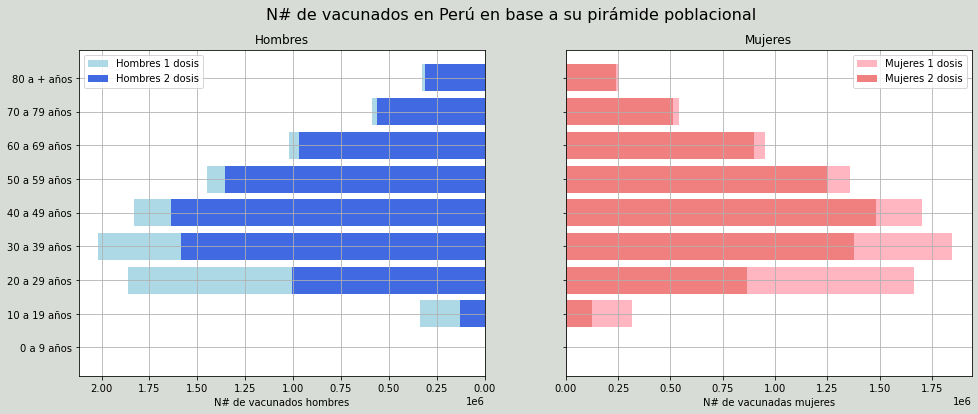

In [25]:
    y = range(0, len(PERU))
    x_male_2_dosis = PERU.N_HOMBRES_2_DOSIS
    x_female_2_dosis = PERU.N_MUJERES_2_DOSIS
    x_male_1_dosis = PERU.N_HOMBRES_1_DOSIS
    x_female_1_dosis = PERU.N_MUJERES_1_DOSIS
    

    fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(16, 6))
    fig.suptitle('N# de vacunados en Perú en base a su pirámide poblacional', fontsize=16) 

    fig.patch.set_facecolor('xkcd:light grey')
    #plt.figtext(.5,.9,'PERÚ', fontsize=15, ha='center')


    axes[0].barh(y, x_male_1_dosis, align='center', color='lightblue',label ='Hombres 1 dosis',  left=x_male_2_dosis)
    axes[0].barh(y, x_male_2_dosis, align='center', color='royalblue',label ='Hombres 2 dosis')

    axes[0].set(title='Hombres')
    axes[1].barh(y, x_female_1_dosis, align='center', color='lightpink',label ='Mujeres 1 dosis',  left=x_female_2_dosis)
    axes[1].barh(y, x_female_2_dosis, align='center', color='lightcoral',label ='Mujeres 2 dosis')

    axes[1].set(title='Mujeres')

    axes[0].legend()
    axes[1].legend()  
    axes[1].grid()
    axes[0].set(yticks=y, yticklabels=EDADES_ARREGLO)
    axes[0].invert_xaxis()
    axes[0].grid()
    axes[0].set_xlabel('N# de vacunados hombres')  
    axes[1].set_xlabel('N# de vacunadas mujeres') 



    plt.show()

In [29]:
for j in [2,1]:   #Usamos 1 y 2 por la cantidad de dosis aplicadas hasta la fecha
    for i in range(9):
        if j == 2 :          
            total = vacunas.loc[(vacunas.EDAD >= EDADES_TRAMA[2*i]) & (vacunas.EDAD <= EDADES_TRAMA[2*i+1]) & (vacunas.DOSIS == j)]
            femenino = vacunas.loc[(vacunas.EDAD >= EDADES_TRAMA[2*i]) & (vacunas.EDAD <= EDADES_TRAMA[2*i+1]) & (vacunas.DOSIS == j)& (vacunas.SEXO == 'MASCULINO')]
            masculino = vacunas.loc[(vacunas.EDAD >= EDADES_TRAMA[2*i]) & (vacunas.EDAD <= EDADES_TRAMA[2*i+1]) & (vacunas.DOSIS == j)& (vacunas.SEXO == 'FEMENINO')]
            total_t=total.count()  #a.count() es una serie
            masculino_t=masculino.count()
            femenino_t=femenino.count()
            PERU.iat[i,j-2]=total_t[0]
            PERU.iat[i,j]=masculino_t[0]
            PERU.iat[i,j+1]=femenino_t[0]
        if j == 1 :          
            total = vacunas.loc[(vacunas.EDAD >= EDADES_TRAMA[2*i]) & (vacunas.EDAD <= EDADES_TRAMA[2*i+1]) & (vacunas.DOSIS == j)]
            femenino = vacunas.loc[(vacunas.EDAD >= EDADES_TRAMA[2*i]) & (vacunas.EDAD <= EDADES_TRAMA[2*i+1]) & (vacunas.DOSIS == j)& (vacunas.SEXO == 'MASCULINO')]
            masculino = vacunas.loc[(vacunas.EDAD >= EDADES_TRAMA[2*i]) & (vacunas.EDAD <= EDADES_TRAMA[2*i+1]) & (vacunas.DOSIS == j)& (vacunas.SEXO == 'FEMENINO')]
            total_t=total.count()  #a.count() es una serie
            masculino_t=masculino.count()
            femenino_t=femenino.count()
            PERU.iat[i,j]=abs(total_t[0] - PERU.iat[i,j-1])
            PERU.iat[i,4*j]=abs(masculino_t[0]-PERU.iat[i,2*j])
            PERU.iat[i,4*j+1]=abs(femenino_t[0]-PERU.iat[i,2*j+1])            

            
            
for t in range(len(EDADES_ARREGLO)):
    if (t != 8 and t!=0):
        PERU.iat[t,14]=INEI_TOTALES.iloc[2*t+1,3] + INEI_TOTALES.iloc[2*t+2,3]
        PERU.iat[t,13]=INEI_TOTALES.iloc[2*t+1,1] + INEI_TOTALES.iloc[2*t+2,1]
        PERU.iat[t,12]=INEI_TOTALES.iloc[2*t+1,2] + INEI_TOTALES.iloc[2*t+2,2] 

#        PERU.iat[t,10]=(PERU.iloc[t,0]*100)/(PERU.iloc[t,0]+PERU.iloc[t,1])      #%total_2_dosis
#        PERU.iat[t,11]=(PERU.iloc[t,1]*100)/(PERU.iloc[t,0]+PERU.iloc[t,1])      #%total_1_dosis
#        PERU.iat[t,6]=(PERU.iloc[t,2]*100)/(PERU.iloc[t,2]+PERU.iloc[t,4])       #%hombres 2 dosis
#        PERU.iat[t,7]=(PERU.iloc[t,3]*100)/(PERU.iloc[t,3]+PERU.iloc[t,5])       #%mujeres 2 dosis
#        PERU.iat[t,8]=(PERU.iloc[t,4]*100)/(PERU.iloc[t,2]+PERU.iloc[t,4])       #%hombres 1 dosis
#        PERU.iat[t,9]=(PERU.iloc[t,5]*100)/(PERU.iloc[t,3]+PERU.iloc[t,5])       #%mujeres 1 dosis    
        
        PERU.iat[t,10]=PERU.iloc[t,0]*100/PERU.iloc[t,14] #%total_2_dosis
        PERU.iat[t,11]=PERU.iloc[t,1]*100/PERU.iloc[t,14] #%total_1_dosis
        PERU.iat[t,6]=PERU.iloc[t,2]*100/PERU.iloc[t,12] #%hombres 2 dosis
        PERU.iat[t,7]=PERU.iloc[t,3]*100/PERU.iloc[t,13] #%mujeres 2 dosis
        PERU.iat[t,8]=PERU.iloc[t,4]*100/PERU.iloc[t,12] #%hombres 1 dosis
        PERU.iat[t,9]=PERU.iloc[t,5]*100/PERU.iloc[t,13] #%mujeres 1 dosis     
        
    elif (t == 8):
        PERU.iat[t,14]=INEI_TOTALES.iloc[17,3] + INEI_TOTALES.iloc[18,3]+ INEI_TOTALES.iloc[19,3]+ INEI_TOTALES.iloc[20,3]+ INEI_TOTALES.iloc[21,3]
        PERU.iat[t,13]=INEI_TOTALES.iloc[17:,1].sum()
        PERU.iat[t,12]=INEI_TOTALES.iloc[17:,2].sum()   

#        PERU.iat[t,10]=(PERU.iloc[t,0]*100)/(PERU.iloc[t,0]+PERU.iloc[t,1])      #%total_2_dosis
#        PERU.iat[t,11]=(PERU.iloc[t,1]*100)/(PERU.iloc[t,0]+PERU.iloc[t,1])      #%total_1_dosis
#        PERU.iat[t,6]=(PERU.iloc[t,2]*100)/(PERU.iloc[t,2]+PERU.iloc[t,4])       #%hombres 2 dosis
#        PERU.iat[t,7]=(PERU.iloc[t,3]*100)/(PERU.iloc[t,3]+PERU.iloc[t,5])       #%mujeres 2 dosis
#        PERU.iat[t,8]=(PERU.iloc[t,4]*100)/(PERU.iloc[t,2]+PERU.iloc[t,4])       #%hombres 1 dosis
#        PERU.iat[t,9]=(PERU.iloc[t,5]*100)/(PERU.iloc[t,3]+PERU.iloc[t,5])       #%mujeres 1 dosis            
                   
        
        
        
        PERU.iat[t,10]=PERU.iloc[t,0]*100/PERU.iloc[t,14] #%total_2_dosis
        PERU.iat[t,11]=PERU.iloc[t,1]*100/PERU.iloc[t,14] #%total_1_dosis
        PERU.iat[t,6]=PERU.iloc[t,2]*100/PERU.iloc[t,12] #%hombres 2 dosis
        PERU.iat[t,7]=PERU.iloc[t,3]*100/PERU.iloc[t,13] #%mujeres 2 dosis
        PERU.iat[t,8]=PERU.iloc[t,4]*100/PERU.iloc[t,12] #%hombres 1 dosis
        PERU.iat[t,9]=PERU.iloc[t,5]*100/PERU.iloc[t,13] #%mujeres 1 dosis            





PERU


,TOTAL_2_DOSIS,TOTAL_1_DOSIS,N_HOMBRES_2_DOSIS,N_MUJERES_2_DOSIS,N_HOMBRES_1_DOSIS,N_MUJERES_1_DOSIS,PORCENTAJE_HOMBRES_2_DOSIS_ARREGLO,PORCENTAJE_MUJERES_2_DOSIS_ARREGLO,PORCENTAJE_HOMBRES_1_DOSIS_ARREGLO,PORCENTAJE_MUJERES_1_DOSIS_ARREGLO,PORCENTAJE_TOTAL_2_DOSIS_ARREGLO,PORCENTAJE_TOTAL_1_DOSIS_ARREGLO,TOTAL_HOMBRES_ARREGLO,TOTAL_MUJERES_ARREGLO,TOTAL_PERSONAS
EDADES_REGION,,,,,,,,,,,,,,,
0 a 9 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10 a 19 años,255607,398231,128836,126771,207706,190525,4,4,8,7,4,7,2591369,2615764,5207133
20 a 29 años,1870283,1654198,1005829,864454,854439,799759,38,30,33,28,34,30,2580198,2801406,5381604
30 a 39 años,2964152,901227,1587087,1377065,429951,471276,61,54,16,18,58,17,2590449,2518386,5108835
40 a 49 años,3119372,413949,1638766,1480606,189939,224010,75,69,8,10,72,9,2163608,2120718,4284326
50 a 59 años,2600978,209755,1354542,1246436,97265,112490,80,74,5,6,77,6,1677353,1682059,3359412
60 a 69 años,1869851,104074,969772,900079,50322,53752,87,75,4,4,81,4,1114287,1185891,2300178
70 a 79 años,1077592,52669,564398,513194,26418,26251,88,75,4,3,81,3,640608,683878,1324486
80 a + años,551543,27222,311782,239761,14892,12330,106,62,5,3,81,4,293885,380968,674853


# GRAFICAMOS EL AVANCE DE LA VACUNACIÓN EN TODO EL PAÍS EN BASE A LOS RANGOS DE EDADES

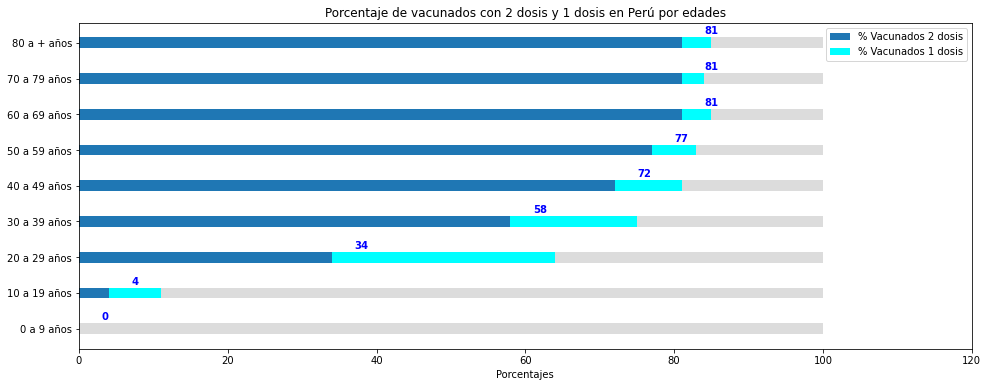

In [30]:
labels = EDADES_ARREGLO


x_2_dosis = PERU.PORCENTAJE_TOTAL_2_DOSIS_ARREGLO
x_1_dosis = PERU.PORCENTAJE_TOTAL_1_DOSIS_ARREGLO

data = np.array([100,100,100,100,100,100,100,100,100])
p100 = pd.Series(data,EDADES_ARREGLO)
p100

width = 0.3

fig, ax = plt.subplots(sharey=True, figsize=(16, 6))   

   
ax.barh(labels, x_2_dosis, width,   
        label ='% Vacunados 2 dosis') 
   
ax.barh(labels, x_1_dosis, width,  
        left = x_2_dosis,  
        label ='% Vacunados 1 dosis', color = 'aqua') 

ax.barh(labels, p100-x_1_dosis-x_2_dosis, width,  
        left = x_2_dosis+ x_1_dosis, color= 'gainsboro') 

ax.set_xlabel('Porcentajes') 
ax.legend() 
ax.set_xlim(0, 120)    
ax.set_title('Porcentaje de vacunados con 2 dosis y 1 dosis en Perú por edades') 

for i, v in enumerate(x_2_dosis): 
    ax.text(v + 3, i + .25, str(v),  
        color = 'blue', fontweight = 'bold') 

#for i, v in enumerate(x_1_dosis): 
#    ax.text(v + 3, i + .25, str(v),  
#        color = 'orange', fontweight = 'bold') 



plt.show() 

# GRAFICAMOS EL AVANCE DE LA VACUNACIÓN EN LA POBLACIÓN OBJETIVO DE TODO EL PAÍS

51.768993742481
13.607859851660734


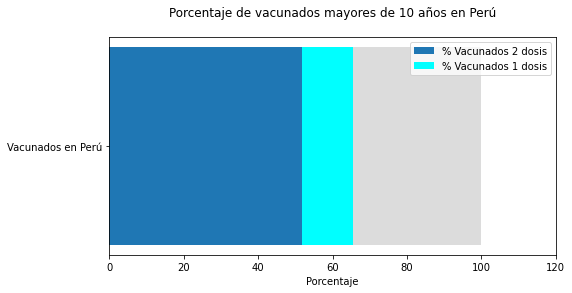

In [31]:
labels = 'Vacunados en Perú'

n2_dosis= PERU.TOTAL_2_DOSIS.sum()-PERU.TOTAL_2_DOSIS[0]
n1_dosis= PERU.TOTAL_1_DOSIS.sum()-PERU.TOTAL_1_DOSIS[0]

n_personas=PERU.TOTAL_PERSONAS.sum()-PERU.TOTAL_PERSONAS[0]
x_2_dosis_total=n2_dosis*100/n_personas
x_1_dosis_total=n1_dosis*100/n_personas 
print(x_2_dosis_total)
print(x_1_dosis_total)
width = 0.3


porcentaje100=100
p100 = porcentaje100 - x_2_dosis - x_1_dosis

fig, ax = plt.subplots(sharey=True, figsize=(8, 4))   

   
ax.barh(labels, x_2_dosis_total, width,   
        label ='% Vacunados 2 dosis') 
   
ax.barh(labels, x_1_dosis_total, width,  
        left = x_2_dosis_total,  
        label ='% Vacunados 1 dosis', color = 'aqua') 

ax.barh(labels, 100-x_1_dosis_total -x_2_dosis_total, width,  
        left = x_1_dosis_total+x_2_dosis_total, color = 'gainsboro')

ax.set_xlabel('Porcentaje') 
ax.legend() 
ax.set_xlim(0, 120)    
ax.set_title('Porcentaje de vacunados mayores de 10 años en Perú\n') 

#for i, v in enumerate(x_2_dosis_total): 
#    ax.text(v + 3, i + .25, str(v),  
#        color = 'blue', fontweight = 'bold') 

#for i, v in enumerate(x_1_dosis): 
#    ax.text(v + 3, i + .25, str(v),  
#        color = 'orange', fontweight = 'bold') 



plt.show() 


In [32]:
LORETO


,TOTAL_2_DOSIS,TOTAL_1_DOSIS,N_HOMBRES_2_DOSIS,N_MUJERES_2_DOSIS,N_HOMBRES_1_DOSIS,N_MUJERES_1_DOSIS,PORCENTAJE_HOMBRES_2_DOSIS_ARREGLO,PORCENTAJE_MUJERES_2_DOSIS_ARREGLO,PORCENTAJE_HOMBRES_1_DOSIS_ARREGLO,PORCENTAJE_MUJERES_1_DOSIS_ARREGLO,PORCENTAJE_TOTAL_2_DOSIS_ARREGLO,PORCENTAJE_TOTAL_1_DOSIS_ARREGLO,TOTAL_HOMBRES_ARREGLO,TOTAL_MUJERES_ARREGLO,TOTAL_PERSONAS
EDADES_REGION,,,,,,,,,,,,,,,
0 a 9 años,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10 a 19 años,2708,3046,1292,1416,1524,1522,45,48,54,51,47,52,107914,104128,212042
20 a 29 años,12789,42513,6221,6568,23861,18652,20,26,79,73,23,76,82670,84535,167205
30 a 39 años,55126,28505,30536,24590,14115,14390,68,63,31,36,65,34,77990,71427,149417
40 a 49 años,57453,16425,29617,27836,7423,9002,79,75,20,24,77,22,58846,48391,107237
50 a 59 años,48953,9699,24622,24331,4155,5544,85,81,14,18,83,16,39656,33164,72820
60 a 69 años,36161,5239,17276,18885,2161,3078,88,85,11,14,87,12,26967,23084,50051
70 a 79 años,18923,2482,8972,9951,1079,1403,89,87,10,12,88,11,14271,12329,26600
80 a + años,6955,1051,3642,3313,498,553,87,85,12,14,86,13,4431,6336,10767
